<a href="https://colab.research.google.com/github/sana1410/ALY6980-Capstone/blob/main/Customer_Segmentation_Straumann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### PROJECT TITLE

 Customer Segementation -Predict Product Buying Patterns with Data Modeling

### OBJECTIVE

Understand and segment the of customers by analyzing past transaction data.

### IMPORT DATA AND LIBRARIES

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
data_1=pd.read_csv('/content/drive/MyDrive/Sponsor Data/2022_eShop.csv')
data_2=pd.read_csv('/content/drive/MyDrive/Sponsor Data/2022_non-eShop.csv')
data_11=pd.read_csv('/content/drive/MyDrive/Sponsor Data/2023_eShop.csv')
data_21=pd.read_csv('/content/drive/MyDrive/Sponsor Data/2023_non-eShop.csv')
data_31=pd.read_csv('/content/drive/MyDrive/Sponsor Data/2024_eShop.csv')
data_32=pd.read_csv('/content/drive/MyDrive/Sponsor Data/2024_non-eShop.csv')

<ipython-input-5-105a8988e991>:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  data_1=pd.read_csv('/content/drive/MyDrive/Sponsor Data/2022_eShop.csv')


Concatenate all the datasets into one dataset

In [6]:
data_3=pd.concat([data_1,data_2,data_11,data_21,data_31,data_32],axis=0,ignore_index=True)

In [7]:
data_3.head()

,order_date,order_number,material_number,order_material_net_value,sales_channel,PRH1,PRH4,customer_group,customer_number,region,DSO_Ind
0,2022-05-12,112140438,034.053V4,40.30,eShop,Implant Solutions,"Instruments, Cases + Others",University,30303430353030353632,NaN,Non-DSO
1,2022-11-28,112656875,109.945,1559.51,eShop,Implant Solutions,"BLAT Ti Implants, standard",General dentist,30303430363032353236,NaN,DSO
2,2022-01-31,111858749,118.357,211.11,eShop,Restorative Solutions,Other Prosthetics,Laboratory,30303430353039373330,NaN,Non-DSO
3,2022-02-28,111935927,024.0008S,39.19,eShop,Implant Solutions,BL Healing Surgical,Periodontist,30303430353239323337,NaN,Non-DSO
4,2022-02-01,111861821,025.2205,58.21,eShop,Restorative Solutions,Other Prosthetics,General dentist,30303430363233343333,NaN,Non-DSO


In [8]:
print('shape of dataset is :',data_3.shape)

shape of dataset is : (3167194, 11)


In [9]:
print(f'no of customers in dataset',data_3['customer_number'].nunique())

no of customers in dataset 68805


Information about each of th columns of dataset

In [10]:
data_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3167194 entries, 0 to 3167193
Data columns (total 11 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   order_date                object 
 1   order_number              int64  
 2   material_number           object 
 3   order_material_net_value  float64
 4   sales_channel             object 
 5   PRH1                      object 
 6   PRH4                      object 
 7   customer_group            object 
 8   customer_number           object 
 9   region                    object 
 10  DSO_Ind                   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 265.8+ MB


Descriptive statistics of numerical columns

In [11]:
round(data_3.describe(),2)

,order_number,order_material_net_value
count,3.167194e+06,3167194.00
mean,1.994159e+09,418.90
std,1.392496e+09,990.79
min,1.117802e+08,-12.51
25%,1.133769e+08,73.89
50%,3.022276e+09,192.44
75%,3.025996e+09,442.00
max,3.029658e+09,210280.00


Checking for duplicates

In [12]:
print(f'the dataset contains',data_3.duplicated().sum(),'duplicate rows')

the dataset contains 0 duplicate rows


In [13]:
data_3['order_date']=pd.to_datetime(data_3['order_date']) ##converting date to datetime

Finding the range of dates of dataset

In [14]:
print(min(data_3['order_date'])) #finding minimum
print(max(data_3['order_date'])) ##finding maximum date

2022-01-01 00:00:00
2024-04-28 00:00:00


pivot table showing no of customers in each sales channel

In [15]:
pd.pivot_table(data_3,index='sales_channel',values='customer_number',aggfunc='nunique')

,customer_number
sales_channel,
eShop,19765
non-eShop,63677


pivot table showing no of customers in product type

In [16]:
pd.pivot_table(data_3,index='PRH1',values='customer_number',aggfunc='nunique')

,customer_number
PRH1,
Biomaterials,10316
Digital Enablers,4326
Implant Solutions,34194
Not assigned,159
Orthodontics,4
Others (PRH 1),5117
Restorative Solutions,61545


pivot table showing no of customers in each customer group

In [17]:
pd.pivot_table(data_3,index='customer_group',values='customer_number',aggfunc='nunique').sort_values(by='customer_number',ascending=False)

,customer_number
customer_group,
General dentist,55001
Laboratory,3676
Periodontist,2530
Surgeon (gen./oral),2185
Orthodontist,1365
Prosthodontist,1143
University,350
Hospital/Clinic,198
Maxillofacial surg,164


### COHORT ANALYSIS

Below is the code for finding the initial purchase date for each customer

In [18]:
df_group=data_3.groupby('customer_number')['order_date'].min().reset_index()

In [19]:
df_group.head()

,customer_number,order_date
0,30303430353030313430,2022-01-12
1,30303430353030313630,2022-01-05
2,30303430353030313631,2022-01-12
3,30303430353030313633,2022-01-06
4,30303430353030313732,2022-01-05


In [20]:
data_4=pd.merge(data_3,df_group,on='customer_number',how='inner')

In [21]:
data_4.columns=['order_date',
 'order_number',
 'material_number',
 'order_material_net_value',
 'sales_channel',
 'PRH1',
 'PRH4',
 'customer_group',
 'customer_number',
 'region',
 'DSO_Ind',
 'Initial_order_date']

In [22]:
data_4['Cohort_Month']=data_4['Initial_order_date'].dt.month
data_4['Cohort_Year']=data_4['Initial_order_date'].dt.year
data_4['Cohort']=data_4['Initial_order_date'].dt.to_period('M')

Code to extract the invoice month from order date

In [23]:
data_4['Invoice_Month']=((data_4['order_date'].dt.year)-(data_4['Initial_order_date'].dt.year))*12+((data_4['order_date'].dt.month)-(data_4['Initial_order_date'].dt.month))+1

In [24]:
data_4.head()

,order_date,order_number,material_number,order_material_net_value,sales_channel,PRH1,PRH4,customer_group,customer_number,region,DSO_Ind,Initial_order_date,Cohort_Month,Cohort_Year,Cohort,Invoice_Month
0,2022-05-12,112140438,034.053V4,40.30,eShop,Implant Solutions,"Instruments, Cases + Others",University,30303430353030353632,NaN,Non-DSO,2022-01-03,1,2022,2022-01,5
1,2022-11-21,112638658,044.710,120.25,eShop,Implant Solutions,"Instruments, Drills + Taps",University,30303430353030353632,NaN,Non-DSO,2022-01-03,1,2022,2022-01,11
2,2022-07-14,112311447,025.4101,23.80,eShop,Restorative Solutions,Other Prosthetics,University,30303430353030353632,NaN,Non-DSO,2022-01-03,1,2022,2022-01,7
3,2022-06-06,112204302,025.4101,22.75,eShop,Restorative Solutions,Other Prosthetics,University,30303430353030353632,NaN,Non-DSO,2022-01-03,1,2022,2022-01,6
4,2022-03-24,112007820,025.4101,227.50,eShop,Restorative Solutions,Other Prosthetics,University,30303430353030353632,NaN,Non-DSO,2022-01-03,1,2022,2022-01,3


In [25]:
data_4.groupby(['Cohort','Invoice_Month'])['customer_number'].count()

Cohort   Invoice_Month
2022-01  1                99145
         2                74549
         3                85359
         4                78292
         5                77624
                          ...  
2024-02  2                  880
         3                  601
2024-03  1                 5103
         2                 1104
2024-04  1                 3853
Name: customer_number, Length: 406, dtype: int64

In [26]:
data_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3167194 entries, 0 to 3167193
Data columns (total 16 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   order_date                datetime64[ns]
 1   order_number              int64         
 2   material_number           object        
 3   order_material_net_value  float64       
 4   sales_channel             object        
 5   PRH1                      object        
 6   PRH4                      object        
 7   customer_group            object        
 8   customer_number           object        
 9   region                    object        
 10  DSO_Ind                   object        
 11  Initial_order_date        datetime64[ns]
 12  Cohort_Month              int32         
 13  Cohort_Year               int32         
 14  Cohort                    period[M]     
 15  Invoice_Month             int64         
dtypes: datetime64[ns](2), float64(1), int32(2), int64(2), 

In [27]:
pivot_table_eshop = pd.pivot_table(data_4[data_4['sales_channel']=='eShop'], index='Cohort', columns='Invoice_Month', values='customer_number', aggfunc='nunique')

In [28]:
pivot_table_shop = pd.pivot_table(data_4[data_4['sales_channel']=='non-eShop'], index='Cohort', columns='Invoice_Month', values='customer_number', aggfunc='nunique')

In [29]:
pivot_table_eshop

Invoice_Month,1,2,3,4,5,6,7,8,9,10,...,19,20,21,22,23,24,25,26,27,28
Cohort,,,,,,,,,,,,,,,,,,,,,
2022-01,4328.0,3085.0,3189.0,3080.0,3091.0,3072.0,2966.0,3145.0,2959.0,2954.0,...,2835.0,3025.0,2876.0,3050.0,2890.0,2713.0,3146.0,3039.0,2979.0,2918.0
2022-02,1128.0,531.0,458.0,485.0,500.0,456.0,513.0,490.0,509.0,493.0,...,536.0,493.0,581.0,540.0,461.0,608.0,561.0,528.0,517.0,NaN
2022-03,888.0,267.0,272.0,277.0,262.0,307.0,262.0,286.0,255.0,232.0,...,294.0,337.0,296.0,279.0,363.0,341.0,328.0,324.0,NaN,NaN
2022-04,530.0,175.0,148.0,130.0,156.0,143.0,112.0,119.0,119.0,170.0,...,167.0,168.0,135.0,194.0,178.0,173.0,150.0,NaN,NaN,NaN
2022-05,455.0,115.0,87.0,127.0,108.0,99.0,103.0,114.0,122.0,134.0,...,145.0,110.0,161.0,142.0,148.0,134.0,NaN,NaN,NaN,NaN
2022-06,364.0,90.0,90.0,63.0,73.0,64.0,61.0,90.0,91.0,102.0,...,81.0,107.0,89.0,90.0,101.0,NaN,NaN,NaN,NaN,NaN
2022-07,269.0,59.0,61.0,52.0,48.0,45.0,64.0,58.0,48.0,63.0,...,78.0,87.0,71.0,72.0,NaN,NaN,NaN,NaN,NaN,NaN
2022-08,321.0,65.0,49.0,49.0,52.0,71.0,64.0,57.0,63.0,83.0,...,82.0,84.0,84.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-09,222.0,43.0,32.0,34.0,32.0,46.0,39.0,43.0,50.0,58.0,...,65.0,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
pivot_table_shop

Invoice_Month,1,2,3,4,5,6,7,8,9,10,...,19,20,21,22,23,24,25,26,27,28
Cohort,,,,,,,,,,,,,,,,,,,,,
2022-01,10853.0,5352.0,5627.0,5225.0,5237.0,5323.0,4825.0,5257.0,5088.0,5109.0,...,4491.0,4805.0,4493.0,4621.0,4369.0,4156.0,4667.0,4582.0,4421.0,4322.0
2022-02,5459.0,1882.0,1521.0,1623.0,1576.0,1463.0,1645.0,1562.0,1557.0,1495.0,...,1481.0,1329.0,1350.0,1307.0,1234.0,1484.0,1370.0,1350.0,1297.0,NaN
2022-03,4759.0,1118.0,1082.0,1104.0,968.0,1085.0,1113.0,1037.0,978.0,950.0,...,955.0,995.0,898.0,844.0,1064.0,998.0,966.0,965.0,NaN,NaN
2022-04,3368.0,742.0,707.0,596.0,669.0,655.0,671.0,623.0,591.0,730.0,...,633.0,561.0,531.0,668.0,646.0,642.0,655.0,NaN,NaN,NaN
2022-05,2966.0,639.0,542.0,585.0,545.0,556.0,570.0,507.0,599.0,556.0,...,510.0,451.0,562.0,548.0,559.0,556.0,NaN,NaN,NaN,NaN
2022-06,2704.0,460.0,492.0,480.0,424.0,433.0,405.0,490.0,465.0,491.0,...,381.0,451.0,434.0,431.0,432.0,NaN,NaN,NaN,NaN,NaN
2022-07,2049.0,413.0,318.0,335.0,313.0,273.0,363.0,330.0,347.0,307.0,...,317.0,333.0,313.0,280.0,NaN,NaN,NaN,NaN,NaN,NaN
2022-08,2216.0,365.0,345.0,321.0,295.0,383.0,349.0,368.0,330.0,335.0,...,346.0,317.0,319.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-09,2039.0,364.0,319.0,277.0,328.0,305.0,346.0,268.0,301.0,304.0,...,291.0,300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
pivot_table_eshop1=pivot_table_eshop.divide(pivot_table_eshop.iloc[:,0],axis=0)

In [32]:
pivot_table_shop1=pivot_table_shop.divide(pivot_table_shop.iloc[:,0],axis=0)

In [33]:
pivot_table_eshop1.sort_index(inplace=True)

In [34]:
pivot_table_eshop1

Invoice_Month,1,2,3,4,5,6,7,8,9,10,...,19,20,21,22,23,24,25,26,27,28
Cohort,,,,,,,,,,,,,,,,,,,,,
2022-01,1.0,0.712800,0.736830,0.711645,0.714187,0.709797,0.685305,0.726664,0.683688,0.682532,...,0.655037,0.698937,0.664510,0.704713,0.667745,0.626848,0.726895,0.702172,0.688309,0.674214
2022-02,1.0,0.470745,0.406028,0.429965,0.443262,0.404255,0.454787,0.434397,0.451241,0.437057,...,0.475177,0.437057,0.515071,0.478723,0.408688,0.539007,0.497340,0.468085,0.458333,NaN
2022-03,1.0,0.300676,0.306306,0.311937,0.295045,0.345721,0.295045,0.322072,0.287162,0.261261,...,0.331081,0.379505,0.333333,0.314189,0.408784,0.384009,0.369369,0.364865,NaN,NaN
2022-04,1.0,0.330189,0.279245,0.245283,0.294340,0.269811,0.211321,0.224528,0.224528,0.320755,...,0.315094,0.316981,0.254717,0.366038,0.335849,0.326415,0.283019,NaN,NaN,NaN
2022-05,1.0,0.252747,0.191209,0.279121,0.237363,0.217582,0.226374,0.250549,0.268132,0.294505,...,0.318681,0.241758,0.353846,0.312088,0.325275,0.294505,NaN,NaN,NaN,NaN
2022-06,1.0,0.247253,0.247253,0.173077,0.200549,0.175824,0.167582,0.247253,0.250000,0.280220,...,0.222527,0.293956,0.244505,0.247253,0.277473,NaN,NaN,NaN,NaN,NaN
2022-07,1.0,0.219331,0.226766,0.193309,0.178439,0.167286,0.237918,0.215613,0.178439,0.234201,...,0.289963,0.323420,0.263941,0.267658,NaN,NaN,NaN,NaN,NaN,NaN
2022-08,1.0,0.202492,0.152648,0.152648,0.161994,0.221184,0.199377,0.177570,0.196262,0.258567,...,0.255452,0.261682,0.261682,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-09,1.0,0.193694,0.144144,0.153153,0.144144,0.207207,0.175676,0.193694,0.225225,0.261261,...,0.292793,0.234234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
pivot_table_shop1

Invoice_Month,1,2,3,4,5,6,7,8,9,10,...,19,20,21,22,23,24,25,26,27,28
Cohort,,,,,,,,,,,,,,,,,,,,,
2022-01,1.0,0.493136,0.518474,0.481434,0.482539,0.490463,0.444578,0.484382,0.468810,0.470745,...,0.413803,0.442735,0.413987,0.425781,0.402562,0.382936,0.430019,0.422187,0.407353,0.398231
2022-02,1.0,0.344752,0.278622,0.297307,0.288698,0.267998,0.301337,0.286133,0.285217,0.273860,...,0.271295,0.243451,0.247298,0.239421,0.226049,0.271845,0.250962,0.247298,0.237589,NaN
2022-03,1.0,0.234923,0.227359,0.231982,0.203404,0.227989,0.233873,0.217903,0.205505,0.199622,...,0.200672,0.209078,0.188695,0.177348,0.223576,0.209708,0.202984,0.202774,NaN,NaN
2022-04,1.0,0.220309,0.209917,0.176960,0.198634,0.194477,0.199228,0.184976,0.175475,0.216746,...,0.187945,0.166568,0.157660,0.198337,0.191805,0.190618,0.194477,NaN,NaN,NaN
2022-05,1.0,0.215442,0.182738,0.197235,0.183749,0.187458,0.192178,0.170937,0.201955,0.187458,...,0.171949,0.152057,0.189481,0.184761,0.188469,0.187458,NaN,NaN,NaN,NaN
2022-06,1.0,0.170118,0.181953,0.177515,0.156805,0.160133,0.149778,0.181213,0.171967,0.181583,...,0.140902,0.166790,0.160503,0.159393,0.159763,NaN,NaN,NaN,NaN,NaN
2022-07,1.0,0.201562,0.155198,0.163494,0.152757,0.133236,0.177160,0.161054,0.169351,0.149829,...,0.154710,0.162518,0.152757,0.136652,NaN,NaN,NaN,NaN,NaN,NaN
2022-08,1.0,0.164711,0.155686,0.144856,0.133123,0.172834,0.157491,0.166065,0.148917,0.151173,...,0.156137,0.143051,0.143953,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-09,1.0,0.178519,0.156449,0.135851,0.160863,0.149583,0.169691,0.131437,0.147621,0.149093,...,0.142717,0.147131,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
pivot_table_eshop_cohort1=pd.pivot_table(data_4[(data_4['sales_channel']=='eShop')], index=['Cohort','customer_group'], columns='Invoice_Month', values='customer_number', aggfunc='nunique',fill_value=0)

In [37]:
pivot_table_non_eshop_cohort1=pd.pivot_table(data_4[(data_4['sales_channel']=='non-eShop')], index=['Cohort','customer_group'], columns='Invoice_Month', values='customer_number', aggfunc='nunique',fill_value=0)

In [38]:
pivot_table_eshop_cohort1=pivot_table_eshop_cohort1.reset_index()

In [39]:
pivot_table_non_eshop_cohort1=pivot_table_non_eshop_cohort1.reset_index()

In [40]:
pivot_table_eshop_cohort1=pivot_table_eshop_cohort1[pivot_table_eshop_cohort1['Cohort']=='2022-01']


In [41]:
pivot_table_non_eshop_cohort1=pivot_table_non_eshop_cohort1[pivot_table_non_eshop_cohort1['Cohort']=='2022-01']


In [42]:
pivot_table_eshop_cohort1.drop('Cohort',axis=1,inplace=True)

In [43]:
pivot_table_non_eshop_cohort1.drop('Cohort',axis=1,inplace=True)

In [44]:
pivot_table_eshop_cohort1.set_index('customer_group',inplace=True)

In [45]:
pivot_table_non_eshop_cohort1.set_index('customer_group',inplace=True)

In [46]:
pivot_table_eshop_cohort1['Total_customers']=pivot_table_eshop_cohort1.iloc[:,0]

In [47]:
pivot_table_non_eshop_cohort1['Total_customers']=pivot_table_non_eshop_cohort1.iloc[:,0]

In [48]:
pivot_table_eshop_cohort1=pivot_table_eshop_cohort1.divide(pivot_table_eshop_cohort1['Total_customers'],axis=0)

In [49]:
pivot_table_non_eshop_cohort1=pivot_table_non_eshop_cohort1.divide(pivot_table_non_eshop_cohort1['Total_customers'],axis=0)

In [50]:
pivot_table_eshop_cohort1=round(pivot_table_eshop_cohort1*100,2)

In [51]:
pivot_table_non_eshop_cohort1=round(pivot_table_non_eshop_cohort1*100,2)

In [52]:
pivot_table_eshop_cohort1=pivot_table_eshop_cohort1.transpose()

In [53]:
pivot_table_non_eshop_cohort1=pivot_table_non_eshop_cohort1.transpose()

In [54]:
pivot_table_eshop_cohort1

customer_group,Denturist,General dentist,Government/Military,Hospital/Clinic,In-house Laboratory,Laboratory,Maxillofacial surg,NOT MAPPED,Orthodontist,Others,Periodontist,Prosthodontist,Staff,Surgeon (gen./oral),University
Invoice_Month,,,,,,,,,,,,,,,
1,NaN,100.00,100.00,100.0,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.0,100.0,100.00
2,NaN,57.06,66.67,60.0,100.00,86.42,107.14,116.67,9.09,116.67,87.00,66.91,100.0,91.4,91.04
3,NaN,59.17,0.00,100.0,90.91,87.94,121.43,133.33,18.18,83.33,91.59,66.19,100.0,95.6,88.06
4,NaN,56.42,33.33,40.0,100.00,85.91,107.14,150.00,9.09,100.00,87.76,70.50,0.0,93.6,91.04
5,NaN,58.21,33.33,60.0,90.91,84.90,107.14,166.67,18.18,100.00,85.47,71.22,100.0,92.6,91.04
6,NaN,57.02,0.00,40.0,63.64,84.90,107.14,116.67,27.27,83.33,88.91,65.47,0.0,92.0,95.52
7,NaN,54.28,66.67,60.0,81.82,82.61,85.71,150.00,36.36,66.67,84.51,68.35,100.0,90.0,86.57
8,NaN,59.49,66.67,80.0,90.91,84.90,107.14,133.33,45.45,66.67,88.72,62.59,200.0,93.4,100.00
9,NaN,54.05,33.33,40.0,81.82,81.35,100.00,116.67,18.18,83.33,86.42,67.63,0.0,90.4,97.01


In [55]:
pivot_table_non_eshop_cohort1

customer_group,Denturist,Distributor/Reseller,Employee,General dentist,Government/Military,Hospital/Clinic,In-house Laboratory,Laboratory,Maxillofacial surg,NOT MAPPED,Orthodontist,Others,Periodontist,Prosthodontist,Staff,Surgeon (gen./oral),University
Invoice_Month,,,,,,,,,,,,,,,,,
1,100.0,100.0,100.0,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.0,100.00,100.00
2,0.0,100.0,0.0,41.23,33.33,52.08,61.90,66.79,66.67,89.29,24.21,39.29,71.94,54.51,50.0,81.00,82.88
3,25.0,100.0,0.0,43.35,44.44,64.58,57.14,68.35,79.49,78.57,28.42,53.57,76.72,60.15,0.0,85.24,83.78
4,25.0,100.0,0.0,40.19,55.56,62.50,66.67,63.18,66.67,80.36,25.26,39.29,71.20,49.62,0.0,82.54,82.88
5,0.0,100.0,0.0,39.57,22.22,62.50,61.90,66.55,71.79,75.00,22.11,50.00,72.92,51.88,50.0,84.21,78.38
6,25.0,100.0,0.0,40.77,33.33,58.33,71.43,65.82,76.92,73.21,26.32,46.43,74.26,53.76,50.0,84.08,74.77
7,25.0,100.0,0.0,36.84,33.33,47.92,61.90,58.72,66.67,76.79,20.00,53.57,67.89,48.12,50.0,77.92,72.97
8,75.0,100.0,0.0,40.38,55.56,52.08,66.67,62.33,76.92,75.00,23.16,53.57,73.04,57.52,0.0,83.06,73.87
9,25.0,100.0,0.0,38.77,44.44,60.42,71.43,61.73,71.79,80.36,25.26,46.43,72.30,52.63,50.0,80.87,74.77


In [56]:
pivot_table_eshop_cohort1.reset_index(inplace=True)

In [57]:
pivot_table_non_eshop_cohort1.reset_index(inplace=True)

In [58]:
pivot_table_eshop_cohort1=pivot_table_eshop_cohort1.drop(pivot_table_eshop_cohort1.index[-1])

In [59]:
pivot_table_non_eshop_cohort1=pivot_table_non_eshop_cohort1.drop(pivot_table_non_eshop_cohort1.index[-1])

In [61]:
#DeepnoteChart(pivot_table_eshop_cohort1, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"trail","color":"#2266D3","tooltip":true},"encoding":{"x":{"axis":{"grid":false},"sort":null,"type":"nominal","field":"Invoice_Month","scale":{"type":"linear","zero":false}},"y":{"axis":{"grid":false},"sort":null,"type":"quantitative","field":"General dentist","scale":{"type":"linear","zero":false},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"color":{"datum":"General dentist"}}}]},{"layer":[{"mark":{"clip":true,"type":"trail","color":"#e45756","tooltip":true},"encoding":{"x":{"axis":{"grid":false},"sort":null,"type":"nominal","field":"Invoice_Month","scale":{"type":"linear","zero":false}},"y":{"axis":{"grid":false},"sort":null,"type":"quantitative","field":"Laboratory","scale":{"type":"linear","zero":false},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"color":{"datum":"Laboratory"}}}]},{"layer":[{"mark":{"clip":true,"type":"trail","color":"#4c78a8","tooltip":true},"encoding":{"x":{"axis":{"grid":false},"sort":null,"type":"nominal","field":"Invoice_Month","scale":{"type":"linear","zero":false}},"y":{"axis":{"grid":false},"sort":null,"type":"quantitative","field":"Surgeon \\\\\\\\\\\\(gen\\\\\\\\\\\\./oral\\\\\\\\\\\\)","scale":{"type":"linear","zero":false},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"color":{"datum":"Surgeon (gen./oral)"}}}]},{"layer":[{"mark":{"clip":true,"type":"trail","color":"#f58518","tooltip":true},"encoding":{"x":{"axis":{"grid":false},"sort":null,"type":"nominal","field":"Invoice_Month","scale":{"type":"linear","zero":false}},"y":{"axis":{"grid":false},"sort":null,"type":"quantitative","field":"Periodontist","scale":{"type":"linear","zero":false},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"color":{"datum":"Periodontist"}}}]}],"title":"","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{},"usermeta":{"tooltipDefaultMode":true}}""")

In [62]:
#DeepnoteChart(pivot_table_non_eshop_cohort1, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"trail","color":"#2266D3","tooltip":true},"encoding":{"x":{"axis":{"grid":false},"sort":null,"type":"nominal","field":"Invoice_Month","scale":{"type":"linear","zero":false}},"y":{"axis":{"grid":false},"sort":null,"type":"quantitative","field":"General dentist","scale":{"type":"linear","zero":false},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"color":{"datum":"General dentist"}}}]},{"layer":[{"mark":{"clip":true,"type":"trail","color":"#4c78a8","tooltip":true},"encoding":{"x":{"axis":{"grid":false},"sort":null,"type":"nominal","field":"Invoice_Month","scale":{"type":"linear","zero":false}},"y":{"axis":{"grid":false},"sort":null,"type":"quantitative","field":"Surgeon \\\\\\\\\\\\(gen\\\\\\\\\\\\./oral\\\\\\\\\\\\)","scale":{"type":"linear","zero":false},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"color":{"datum":"Surgeon (gen./oral)"}}}]},{"layer":[{"mark":{"clip":true,"type":"trail","color":"#f58518","tooltip":true},"encoding":{"x":{"axis":{"grid":false},"sort":null,"type":"nominal","field":"Invoice_Month","scale":{"type":"linear","zero":false}},"y":{"axis":{"grid":false},"sort":null,"type":"quantitative","field":"Periodontist","scale":{"type":"linear","zero":false},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"color":{"datum":"Periodontist"}}}]},{"layer":[{"mark":{"clip":true,"type":"trail","color":"#e45756","tooltip":true},"encoding":{"x":{"axis":{"grid":false},"sort":null,"type":"nominal","field":"Invoice_Month","scale":{"type":"linear","zero":false}},"y":{"axis":{"grid":false},"sort":null,"type":"quantitative","field":"Laboratory","scale":{"type":"linear","zero":false},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"color":{"datum":"Laboratory"}}}]}],"title":"","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{},"usermeta":{"tooltipDefaultMode":true}}""")

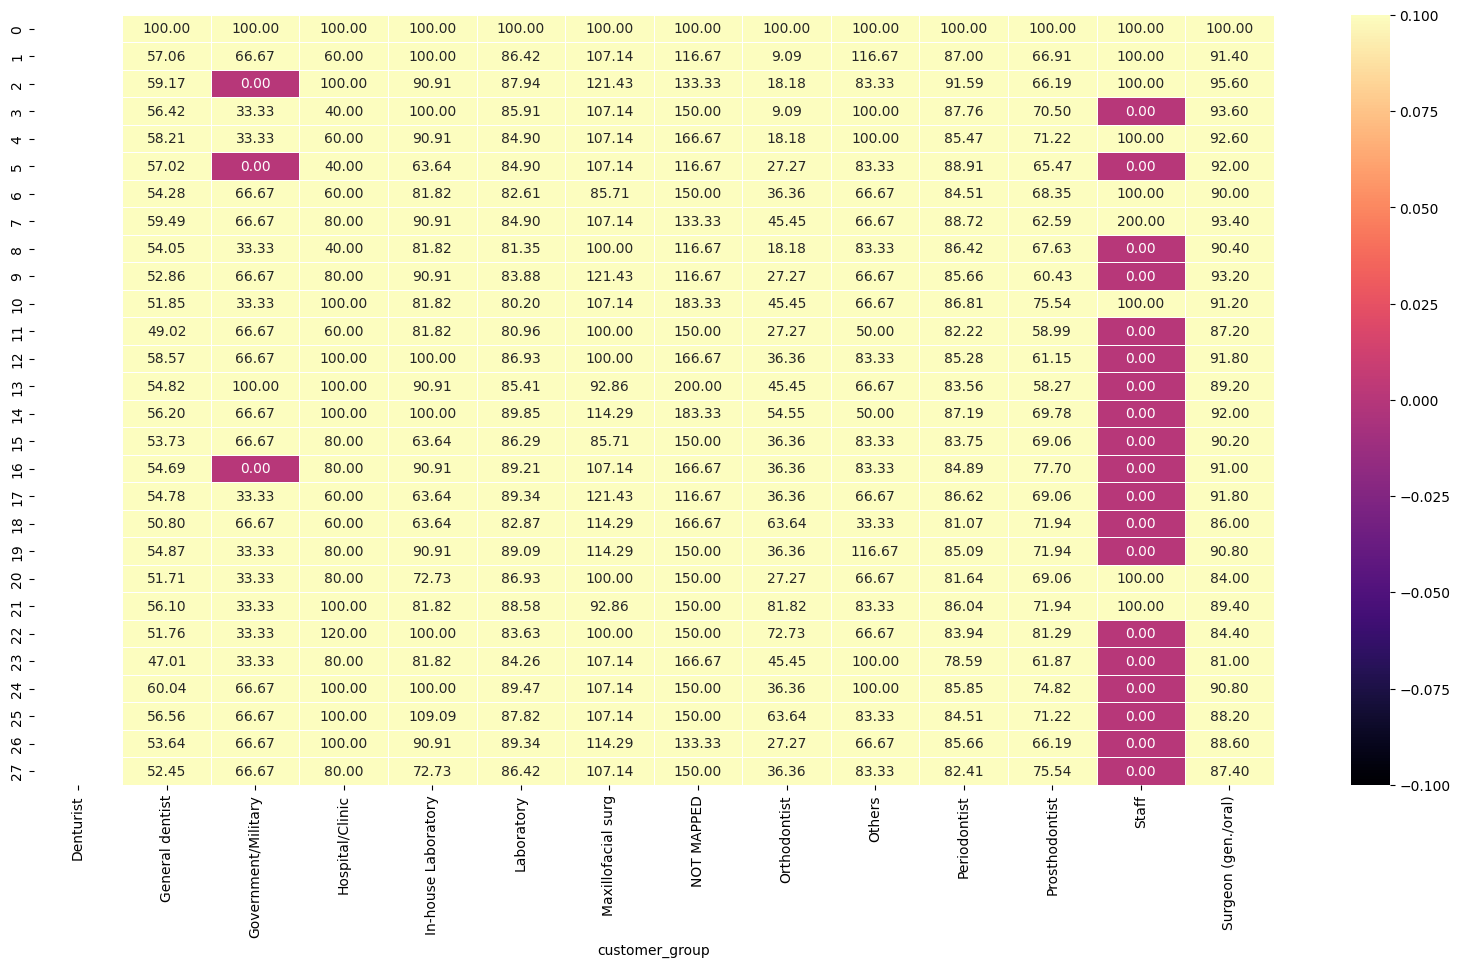

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 10))
# Customizing the appearance of the heatmap
sns.heatmap(pivot_table_eshop_cohort1.iloc[:,1:-1], cmap='magma', annot=True, fmt='.2f', linewidths=.5)

# Display the plot
plt.show()

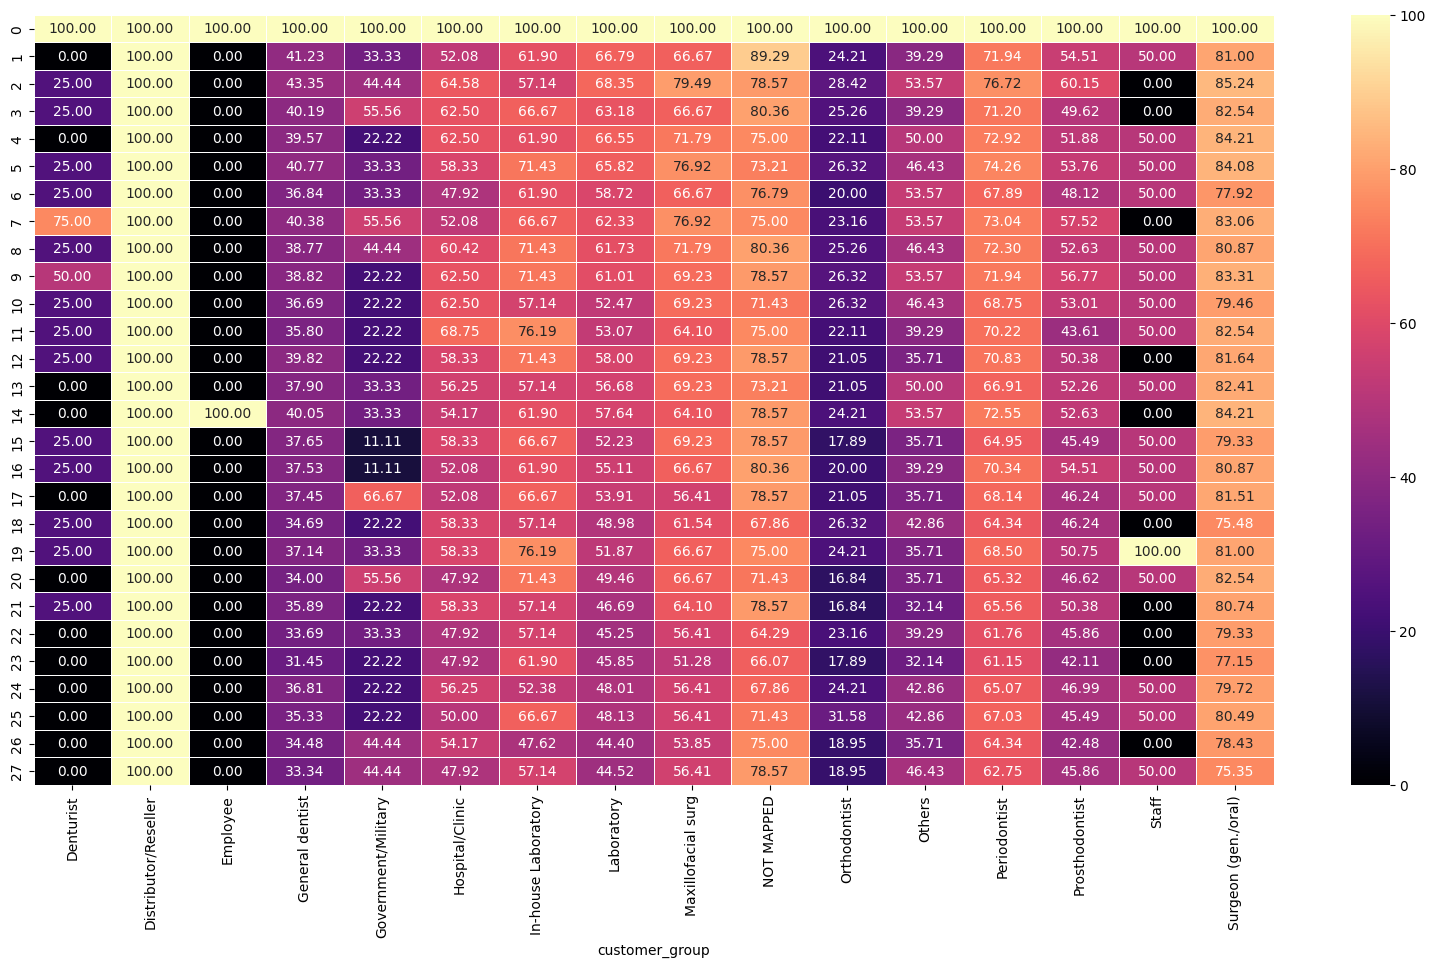

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 10))
# Customizing the appearance of the heatmap
sns.heatmap(pivot_table_non_eshop_cohort1.iloc[:,1:-1], cmap='magma', annot=True, fmt='.2f', linewidths=.5)

# Display the plot
plt.show()

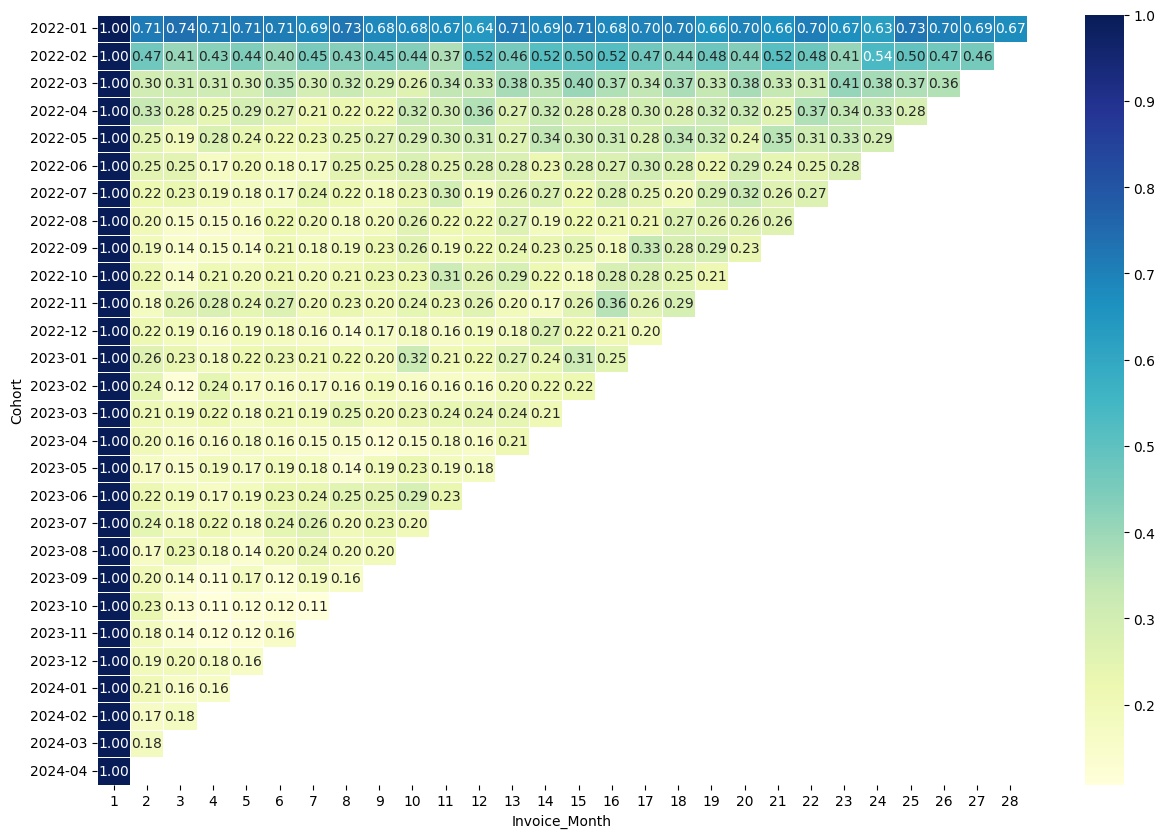

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15, 10))
# Customizing the appearance of the heatmap
sns.heatmap(pivot_table_eshop1, cmap='YlGnBu', annot=True, fmt='.2f', linewidths=.5)

# Display the plot
plt.show()


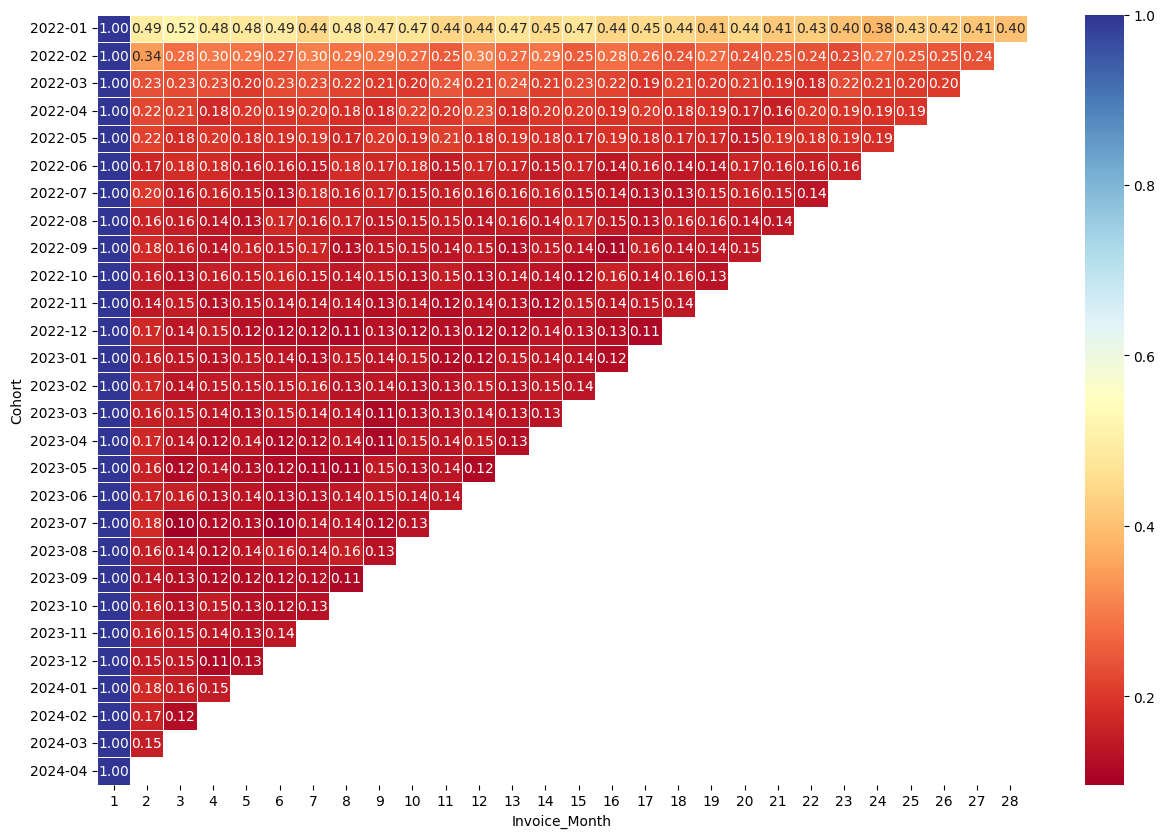

In [66]:
plt.figure(figsize=(15, 10))
# Customizing the appearance of the heatmap
sns.heatmap(pivot_table_shop1, cmap='RdYlBu', annot=True, fmt='.2f', linewidths=.5)

# Display the plot
plt.show()

In [67]:
data_4.columns.to_list()

['order_date',
 'order_number',
 'material_number',
 'order_material_net_value',
 'sales_channel',
 'PRH1',
 'PRH4',
 'customer_group',
 'customer_number',
 'region',
 'DSO_Ind',
 'Initial_order_date',
 'Cohort_Month',
 'Cohort_Year',
 'Cohort',
 'Invoice_Month']

### Cleaning missing values

In [68]:
data_5=data_4[['order_date',
 'order_number',
 'material_number',
 'order_material_net_value',
 'sales_channel',
 'PRH1',
 'PRH4',
 'customer_group',
 'customer_number',
 'region',
 'DSO_Ind',
 'Cohort',
 'Invoice_Month']]

In [69]:
data_5.head()

,order_date,order_number,material_number,order_material_net_value,sales_channel,PRH1,PRH4,customer_group,customer_number,region,DSO_Ind,Cohort,Invoice_Month
0,2022-05-12,112140438,034.053V4,40.30,eShop,Implant Solutions,"Instruments, Cases + Others",University,30303430353030353632,NaN,Non-DSO,2022-01,5
1,2022-11-21,112638658,044.710,120.25,eShop,Implant Solutions,"Instruments, Drills + Taps",University,30303430353030353632,NaN,Non-DSO,2022-01,11
2,2022-07-14,112311447,025.4101,23.80,eShop,Restorative Solutions,Other Prosthetics,University,30303430353030353632,NaN,Non-DSO,2022-01,7
3,2022-06-06,112204302,025.4101,22.75,eShop,Restorative Solutions,Other Prosthetics,University,30303430353030353632,NaN,Non-DSO,2022-01,6
4,2022-03-24,112007820,025.4101,227.50,eShop,Restorative Solutions,Other Prosthetics,University,30303430353030353632,NaN,Non-DSO,2022-01,3


In [70]:
data_5.isna().sum()/len(data_5)

order_date                  0.000000
order_number                0.000000
material_number             0.000000
order_material_net_value    0.000000
sales_channel               0.000000
PRH1                        0.000000
PRH4                        0.000069
customer_group              0.006808
customer_number             0.000000
region                      0.475033
DSO_Ind                     0.000000
Cohort                      0.000000
Invoice_Month               0.000000
dtype: float64

In [72]:
#DeepnoteChart(data_5, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"bar","color":"#2266D3","tooltip":true},"encoding":{"x":{"axis":{"grid":false},"sort":{"order":"descending","encoding":"y"},"type":"nominal","field":"PRH1","scale":{"type":"linear"}},"y":{"axis":{"grid":false,"title":null},"sort":null,"type":"quantitative","field":"customer_number","scale":{"type":"linear"},"format":{"type":"default","decimals":null},"aggregate":"distinct","formatType":"numberFormatFromNumberType"},"color":{"datum":"Distinct of customer_number"},"xOffset":{"datum":"Distinct of customer_number"}}},{"mark":{"dx":0,"dy":-1,"fill":"black","type":"text","align":"center","baseline":"bottom"},"encoding":{"x":{"axis":{"grid":false},"sort":{"order":"descending","encoding":"y"},"type":"nominal","field":"PRH1","scale":{"type":"linear"}},"y":{"axis":{"grid":false,"title":null},"sort":null,"type":"quantitative","field":"customer_number","scale":{"type":"linear"},"format":{"type":"default","decimals":null},"aggregate":"distinct","formatType":"numberFormatFromNumberType"},"text":{"sort":null,"type":"quantitative","field":"customer_number","aggregate":"distinct"},"color":{"datum":"Distinct of customer_number"},"xOffset":{"datum":"Distinct of customer_number"}}}]},{"layer":[{"mark":{"clip":true,"type":"bar","color":"#4c78a8","tooltip":true},"encoding":{"x":{"axis":{"grid":false},"sort":{"order":"descending","encoding":"y"},"type":"nominal","field":"PRH1","scale":{"type":"linear"}},"y":{"axis":{"grid":false,"title":null},"sort":null,"type":"quantitative","field":"order_number","scale":{"type":"linear"},"format":{"type":"default","decimals":null},"aggregate":"distinct","formatType":"numberFormatFromNumberType"},"color":{"datum":"Distinct of order_number"},"xOffset":{"datum":"Distinct of order_number"}}},{"mark":{"dx":0,"dy":-1,"fill":"black","type":"text","align":"center","baseline":"bottom"},"encoding":{"x":{"axis":{"grid":false},"sort":{"order":"descending","encoding":"y"},"type":"nominal","field":"PRH1","scale":{"type":"linear"}},"y":{"axis":{"grid":false,"title":null},"sort":null,"type":"quantitative","field":"order_number","scale":{"type":"linear"},"format":{"type":"default","decimals":null},"aggregate":"distinct","formatType":"numberFormatFromNumberType"},"text":{"sort":null,"type":"quantitative","field":"order_number","aggregate":"distinct"},"color":{"datum":"Distinct of order_number"},"xOffset":{"datum":"Distinct of order_number"}}}]}],"title":"No of customers per PRH1","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{},"usermeta":{"tooltipDefaultMode":true}}""")

In [73]:
#DeepnoteChart(data_5, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"bar","tooltip":true},"encoding":{"x":{"axis":{"grid":false},"sort":{"order":"descending","encoding":"y"},"type":"nominal","field":"customer_group","scale":{"type":"linear"}},"y":{"axis":{"grid":false,"title":null},"sort":null,"type":"quantitative","field":"order_number","scale":{"type":"linear"},"format":{"type":"default","decimals":null},"aggregate":"distinct","formatType":"numberFormatFromNumberType"},"color":{"sort":null,"type":"nominal","field":"customer_group","scale":{"scheme":"deepnote10"}}}},{"mark":{"dx":0,"dy":-1,"fill":"black","type":"text","align":"center","baseline":"bottom"},"encoding":{"x":{"axis":{"grid":false},"sort":{"order":"descending","encoding":"y"},"type":"nominal","field":"customer_group","scale":{"type":"linear"}},"y":{"axis":{"grid":false,"title":null},"sort":null,"type":"quantitative","field":"order_number","scale":{"type":"linear"},"format":{"type":"default","decimals":null},"aggregate":"distinct","formatType":"numberFormatFromNumberType"},"text":{"sort":null,"type":"quantitative","field":"order_number","aggregate":"distinct"},"color":{"sort":null,"type":"nominal","field":"customer_group","scale":{"scheme":"deepnote10"}}}}]}],"title":"No of order per group","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{},"usermeta":{"tooltipDefaultMode":true}}""")

In [74]:
#DeepnoteChart(data_5, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"bar","tooltip":true},"encoding":{"x":{"sort":{"order":"descending","encoding":"y"},"type":"nominal","field":"PRH4","scale":{"type":"linear"}},"y":{"axis":{"title":null},"sort":null,"type":"quantitative","field":"order_number","scale":{"type":"linear"},"format":{"type":"default","decimals":null},"aggregate":"distinct","formatType":"numberFormatFromNumberType"},"color":{"sort":null,"type":"nominal","field":"PRH4","scale":{"scheme":"deepnote10"}}}},{"mark":{"dx":0,"dy":-1,"fill":"black","type":"text","align":"center","baseline":"bottom"},"encoding":{"x":{"sort":{"order":"descending","encoding":"y"},"type":"nominal","field":"PRH4","scale":{"type":"linear"}},"y":{"axis":{"title":null},"sort":null,"type":"quantitative","field":"order_number","scale":{"type":"linear"},"format":{"type":"default","decimals":null},"aggregate":"distinct","formatType":"numberFormatFromNumberType"},"text":{"sort":null,"type":"quantitative","field":"order_number","aggregate":"distinct"},"color":{"sort":null,"type":"nominal","field":"PRH4","scale":{"scheme":"deepnote10"}}}}]}],"title":"","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{},"usermeta":{"tooltipDefaultMode":true}}""")

In [75]:
data_5.drop('region',axis=1,inplace=True)

<ipython-input-75-6ff16313ed48>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_5.drop('region',axis=1,inplace=True)


In [76]:
data_5=data_5.fillna('N/A')

In [77]:
data_5.isna().sum()

order_date                  0
order_number                0
material_number             0
order_material_net_value    0
sales_channel               0
PRH1                        0
PRH4                        0
customer_group              0
customer_number             0
DSO_Ind                     0
Cohort                      0
Invoice_Month               0
dtype: int64

### RFM analysis

In [78]:
df_group2=data_3.groupby('customer_number')['order_date'].max()
df_group3=data_3.groupby('customer_number')['order_number'].nunique()
df_group4=data_3.groupby('customer_number')['order_material_net_value'].sum()

In [79]:
df_group_rfm=pd.concat([df_group2,df_group3,df_group4],axis=1).reset_index()

In [80]:
df_group_rfm = df_group_rfm.rename(columns={'order_date': 'last_purchase', 'order_number': 'frequency','order_material_net_value': 'monetary'})

In [81]:
df_group_rfm['Recency']=(max(data_5['order_date'])-df_group_rfm['last_purchase']).dt.days

In [82]:
df_group_rfm.head()


,customer_number,last_purchase,frequency,monetary,Recency
0,30303430353030313430,2024-03-20,20,8839.00,39
1,30303430353030313630,2024-04-24,175,527123.83,4
2,30303430353030313631,2024-04-19,33,4954.80,9
3,30303430353030313633,2024-04-26,202,65503.63,2
4,30303430353030313732,2024-04-24,206,298302.18,4


In [83]:
df_group_rfm.drop('last_purchase',axis=1,inplace=True)

In [84]:
df_group_rfm.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68805 entries, 0 to 68804
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_number  68805 non-null  object 
 1   frequency        68805 non-null  int64  
 2   monetary         68805 non-null  float64
 3   Recency          68805 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 2.1+ MB


In [86]:
#DeepnoteChart(df_group_rfm, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"bar","color":"#2266D3","tooltip":true},"encoding":{"x":{"bin":{"step":50},"axis":{"grid":false,"title":null},"sort":null,"type":"quantitative","field":"Recency"},"y":{"axis":{"grid":false},"sort":null,"type":"quantitative","scale":{"type":"linear"},"format":{"type":"default","decimals":null},"aggregate":"count","formatType":"numberFormatFromNumberType"}}}]}],"title":"","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{},"usermeta":{"aditionalTypeInfo":{"histogramLayerIndexes":[0]},"tooltipDefaultMode":true}}""")

In [87]:
#DeepnoteChart(df_group_rfm, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"bar","color":"#F9732C","tooltip":true},"encoding":{"x":{"bin":{"step":50},"axis":{"grid":false},"sort":null,"type":"quantitative","field":"frequency"},"y":{"axis":{"grid":false},"sort":null,"type":"quantitative","scale":{"type":"linear"},"format":{"type":"default","decimals":null},"aggregate":"count","formatType":"numberFormatFromNumberType"}}}]}],"title":"","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{},"usermeta":{"aditionalTypeInfo":{"histogramLayerIndexes":[0]},"tooltipDefaultMode":true}}""")

### Calculating RFM score and RFM segment

In [88]:
r_values=[4,3,2,1]
f_values=[1,2,3,4]
m_values=[1,2,3,4]
df_group_rfm['R_score']=pd.qcut(df_group_rfm['Recency'],q=4,labels=r_values)
df_group_rfm['F_score']=pd.qcut(df_group_rfm['frequency'],q=4,labels=f_values)
df_group_rfm['M_score']=pd.qcut(df_group_rfm['monetary'],q=4,labels=m_values)

In [89]:
df_group_rfm.head(10)

,customer_number,frequency,monetary,Recency,R_score,F_score,M_score
0,30303430353030313430,20,8839.00,39,3,4,4
1,30303430353030313630,175,527123.83,4,4,4,4
2,30303430353030313631,33,4954.80,9,4,4,3
3,30303430353030313633,202,65503.63,2,4,4,4
4,30303430353030313732,206,298302.18,4,4,4,4
5,30303430353030313738,24,25501.00,96,3,4,4
6,30303430353030313830,8,1095.00,69,3,3,3
7,30303430353030313836,1,390.00,347,2,1,2
8,30303430353030313930,157,219131.61,12,4,4,4
9,30303430353030313938,32,13969.50,26,4,4,4


In [91]:
#DeepnoteChart(df_group_rfm, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"bar","tooltip":true},"encoding":{"x":{"axis":{"grid":false},"sort":"ascending","type":"nominal","field":"R_score","scale":{"type":"linear"}},"y":{"axis":{"grid":false,"format":".2f"},"sort":null,"type":"quantitative","field":"Recency","scale":{"type":"linear"},"format":{"type":"number","decimals":null},"aggregate":"average","formatType":"numberFormatFromNumberType"},"color":{"sort":null,"type":"nominal","field":"R_score","scale":{"scheme":"deepnote10"}}}},{"mark":{"dx":0,"dy":-1,"fill":"black","type":"text","align":"center","baseline":"bottom"},"encoding":{"x":{"axis":{"grid":false},"sort":"ascending","type":"nominal","field":"R_score","scale":{"type":"linear"}},"y":{"axis":{"grid":false,"format":".2f"},"sort":null,"type":"quantitative","field":"Recency","scale":{"type":"linear"},"format":{"type":"number","decimals":null},"aggregate":"average","formatType":"numberFormatFromNumberType"},"text":{"sort":null,"type":"quantitative","field":"Recency","aggregate":"average"},"color":{"sort":null,"type":"nominal","field":"R_score","scale":{"scheme":"deepnote10"}}}}]}],"title":"","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{},"usermeta":{"tooltipDefaultMode":true}}""")

In [92]:
#DeepnoteChart(df_group_rfm, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"bar","tooltip":true},"encoding":{"x":{"axis":{"grid":false},"sort":{"order":"descending","encoding":"y"},"type":"nominal","field":"F_score","scale":{"type":"linear"}},"y":{"axis":{"grid":false},"sort":null,"type":"quantitative","field":"frequency","scale":{"type":"linear"},"format":{"type":"default","decimals":null},"aggregate":"average","formatType":"numberFormatFromNumberType"},"color":{"sort":null,"type":"nominal","field":"F_score","scale":{"scheme":"deepnote10"}}}},{"mark":{"dx":0,"dy":-1,"fill":"black","type":"text","align":"center","baseline":"bottom"},"encoding":{"x":{"axis":{"grid":false},"sort":{"order":"descending","encoding":"y"},"type":"nominal","field":"F_score","scale":{"type":"linear"}},"y":{"axis":{"grid":false},"sort":null,"type":"quantitative","field":"frequency","scale":{"type":"linear"},"format":{"type":"default","decimals":null},"aggregate":"average","formatType":"numberFormatFromNumberType"},"text":{"sort":null,"type":"quantitative","field":"frequency","aggregate":"average"},"color":{"sort":null,"type":"nominal","field":"F_score","scale":{"scheme":"deepnote10"}}}}]}],"title":"","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{},"usermeta":{"tooltipDefaultMode":true}}""")

In [93]:
#DeepnoteChart(df_group_rfm, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"bar","tooltip":true},"encoding":{"x":{"axis":{"grid":false},"sort":"descending","type":"nominal","field":"M_score","scale":{"type":"linear"}},"y":{"axis":{"grid":false},"sort":null,"type":"quantitative","field":"monetary","scale":{"type":"linear"},"format":{"type":"default","decimals":null},"aggregate":"average","formatType":"numberFormatFromNumberType"},"color":{"sort":null,"type":"nominal","field":"M_score","scale":{"scheme":"tableau10"}}}},{"mark":{"dx":0,"dy":-1,"fill":"black","type":"text","align":"center","baseline":"bottom"},"encoding":{"x":{"axis":{"grid":false},"sort":"descending","type":"nominal","field":"M_score","scale":{"type":"linear"}},"y":{"axis":{"grid":false},"sort":null,"type":"quantitative","field":"monetary","scale":{"type":"linear"},"format":{"type":"default","decimals":null},"aggregate":"average","formatType":"numberFormatFromNumberType"},"text":{"sort":null,"type":"quantitative","field":"monetary","aggregate":"average"},"color":{"sort":null,"type":"nominal","field":"M_score","scale":{"scheme":"tableau10"}}}}]}],"title":"","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{},"usermeta":{"tooltipDefaultMode":true}}""")

In [94]:
df_group_rfm['RFM_segment']=df_group_rfm['R_score'].astype('str')+df_group_rfm['F_score'].astype('str')+df_group_rfm['M_score'].astype('str')

In [95]:
df_group_rfm['RFM_score']=df_group_rfm['R_score'].astype('int')+df_group_rfm['F_score'].astype('int')+df_group_rfm['M_score'].astype('int')

In [97]:
#DeepnoteChart(df_group_rfm, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"bar","color":"#2266D3","tooltip":true},"encoding":{"x":{"bin":true,"axis":{"grid":false},"sort":null,"type":"quantitative","field":"RFM_score"},"y":{"axis":{"grid":false},"sort":null,"scale":{"type":"linear"},"aggregate":"count"}}}]}],"title":"","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{},"usermeta":{"aditionalTypeInfo":{"histogramLayerIndexes":[0]},"tooltipDefaultMode":true}}""")

In [98]:
#DeepnoteChart(df_group_rfm, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"circle","tooltip":true},"encoding":{"x":{"axis":{"grid":false},"sort":null,"type":"quantitative","field":"Recency","scale":{"type":"linear","zero":false},"format":{"type":"default","decimals":null},"aggregate":"average","formatType":"numberFormatFromNumberType"},"y":{"axis":{"grid":false},"sort":null,"type":"quantitative","field":"RFM_score","scale":{"type":"linear","zero":false},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"size":{"sort":null,"type":"quantitative","field":"RFM_score"},"color":{"sort":null,"type":"nominal","field":"RFM_segment","scale":{"scheme":"deepnote10"}}}}]}],"title":"","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{},"usermeta":{"tooltipDefaultMode":true}}""")

In [99]:
#DeepnoteChart(df_group_rfm, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"circle","tooltip":true},"encoding":{"x":{"axis":{"grid":false},"sort":null,"type":"quantitative","field":"RFM_score","scale":{"type":"linear","zero":false},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"y":{"axis":{"grid":false},"sort":null,"type":"quantitative","field":"frequency","scale":{"type":"linear","zero":false},"format":{"type":"default","decimals":null},"aggregate":"sum","formatType":"numberFormatFromNumberType"},"size":{"sort":null,"type":"quantitative","field":"RFM_score"},"color":{"sort":null,"type":"nominal","field":"RFM_segment","scale":{"scheme":"deepnote10"}}}}]}],"title":"","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{},"usermeta":{"tooltipDefaultMode":true}}""")

In [100]:
#DeepnoteChart(df_group_rfm, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"circle","tooltip":true},"encoding":{"x":{"axis":{"grid":false},"sort":null,"type":"quantitative","field":"RFM_score","scale":{"type":"linear","zero":false},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"y":{"axis":{"grid":false},"sort":null,"type":"quantitative","field":"monetary","scale":{"type":"linear","zero":false},"format":{"type":"default","decimals":null},"aggregate":"sum","formatType":"numberFormatFromNumberType"},"size":{"sort":null,"type":"quantitative","field":"RFM_score"},"color":{"sort":null,"type":"nominal","field":"RFM_segment","scale":{"scheme":"deepnote10"}}}}]}],"title":"","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{},"usermeta":{"tooltipDefaultMode":true}}""")

In [101]:
df_group_rfm.groupby('RFM_segment')[['Recency','frequency','monetary','RFM_score']].mean()

,Recency,frequency,monetary,RFM_score
RFM_segment,,,,
111,607.420735,1.192526,128.647454,3.0
112,597.571472,1.481829,461.459316,4.0
113,604.309795,1.487472,2426.886230,5.0
114,578.605556,1.413889,17478.795278,6.0
121,528.034161,3.108696,204.715248,4.0
122,525.048765,3.343953,523.421977,5.0
123,535.375918,3.443465,1993.982658,6.0
124,525.956522,3.449275,21687.106522,7.0
131,432.000000,5.272727,202.136364,5.0


In [102]:
def consumer_new_group(x):
    if x>10 and x<=12 :
        group ='Gold'
    elif x>4 and x<=10:
        group ='Silver'
    else :
        group= 'Bronze'
    return group



In [103]:
df_group_rfm['group']=df_group_rfm['RFM_score'].apply(consumer_new_group)

In [104]:
df_group_rfm.head()

,customer_number,frequency,monetary,Recency,R_score,F_score,M_score,RFM_segment,RFM_score,group
0,30303430353030313430,20,8839.00,39,3,4,4,344,11,Gold
1,30303430353030313630,175,527123.83,4,4,4,4,444,12,Gold
2,30303430353030313631,33,4954.80,9,4,4,3,443,11,Gold
3,30303430353030313633,202,65503.63,2,4,4,4,444,12,Gold
4,30303430353030313732,206,298302.18,4,4,4,4,444,12,Gold


In [105]:
pivot_table_rfm=pd.pivot_table(df_group_rfm,index='group',values=['Recency','monetary','frequency'],aggfunc='mean')

In [106]:
pivot_table_rfm

,Recency,frequency,monetary
group,,,
Bronze,503.275424,1.318086,198.387869
Gold,20.295395,55.430369,82338.754620
Silver,178.970866,5.623807,4001.302501


In [107]:
pd.pivot_table(df_group_rfm,index='group',values=['customer_number'],aggfunc='nunique')

,customer_number
group,
Bronze,16549
Gold,14225
Silver,38031


In [108]:
data_5.head()

,order_date,order_number,material_number,order_material_net_value,sales_channel,PRH1,PRH4,customer_group,customer_number,DSO_Ind,Cohort,Invoice_Month
0,2022-05-12,112140438,034.053V4,40.30,eShop,Implant Solutions,"Instruments, Cases + Others",University,30303430353030353632,Non-DSO,2022-01,5
1,2022-11-21,112638658,044.710,120.25,eShop,Implant Solutions,"Instruments, Drills + Taps",University,30303430353030353632,Non-DSO,2022-01,11
2,2022-07-14,112311447,025.4101,23.80,eShop,Restorative Solutions,Other Prosthetics,University,30303430353030353632,Non-DSO,2022-01,7
3,2022-06-06,112204302,025.4101,22.75,eShop,Restorative Solutions,Other Prosthetics,University,30303430353030353632,Non-DSO,2022-01,6
4,2022-03-24,112007820,025.4101,227.50,eShop,Restorative Solutions,Other Prosthetics,University,30303430353030353632,Non-DSO,2022-01,3


In [109]:
data_final=pd.merge(df_group_rfm[['customer_number','group']],data_5,how='right',on='customer_number')

In [110]:
data_final.head()

,customer_number,group,order_date,order_number,material_number,order_material_net_value,sales_channel,PRH1,PRH4,customer_group,DSO_Ind,Cohort,Invoice_Month
0,30303430353030353632,Gold,2022-05-12,112140438,034.053V4,40.30,eShop,Implant Solutions,"Instruments, Cases + Others",University,Non-DSO,2022-01,5
1,30303430353030353632,Gold,2022-11-21,112638658,044.710,120.25,eShop,Implant Solutions,"Instruments, Drills + Taps",University,Non-DSO,2022-01,11
2,30303430353030353632,Gold,2022-07-14,112311447,025.4101,23.80,eShop,Restorative Solutions,Other Prosthetics,University,Non-DSO,2022-01,7
3,30303430353030353632,Gold,2022-06-06,112204302,025.4101,22.75,eShop,Restorative Solutions,Other Prosthetics,University,Non-DSO,2022-01,6
4,30303430353030353632,Gold,2022-03-24,112007820,025.4101,227.50,eShop,Restorative Solutions,Other Prosthetics,University,Non-DSO,2022-01,3


In [112]:
#DeepnoteChart(data_final, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"bar","tooltip":true},"encoding":{"x":{"axis":{"grid":false,"title":null},"sort":{"order":"descending","encoding":"y"},"type":"nominal","field":"customer_group","scale":{"type":"linear"}},"y":{"axis":{"grid":false,"title":"No of customers "},"sort":null,"type":"quantitative","field":"customer_number","scale":{"type":"linear"},"format":{"type":"default","decimals":null},"aggregate":"distinct","formatType":"numberFormatFromNumberType"},"color":{"sort":null,"type":"nominal","field":"group","scale":{"scheme":"deepnote10"}},"xOffset":{"sort":null,"type":"nominal","field":"group"}}}]}],"title":"No of customers per customer group","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{},"usermeta":{"tooltipDefaultMode":true}}""")

In [113]:
#DeepnoteChart(data_final, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"bar","tooltip":true},"encoding":{"x":{"axis":{"grid":false},"sort":null,"type":"nominal","field":"group","scale":{"type":"linear"},"stack":"zero"},"y":{"axis":{"grid":false,"title":null},"sort":null,"type":"quantitative","field":"customer_number","scale":{"type":"linear"},"stack":"zero","format":{"type":"default","decimals":null},"aggregate":"distinct","formatType":"numberFormatFromNumberType"},"color":{"sort":{"order":"descending","encoding":"y"},"type":"nominal","field":"customer_group","scale":{"scheme":"tableau20"}},"order":{"axis":{"grid":false,"title":null},"sort":null,"type":"quantitative","field":"customer_number","scale":{"type":"linear"},"stack":"zero","format":{"type":"default","decimals":null},"aggregate":"distinct","formatType":"numberFormatFromNumberType"}}}]}],"title":"Plot showing distribution of customers per group","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{},"usermeta":{"tooltipDefaultMode":true}}""")

In [114]:
#DeepnoteChart(data_final, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"bar","tooltip":true},"encoding":{"x":{"axis":{"grid":false},"sort":null,"type":"nominal","field":"group","scale":{"type":"linear"}},"y":{"axis":{"grid":false,"title":"No of Orders "},"sort":null,"type":"quantitative","field":"order_number","scale":{"type":"linear"},"format":{"type":"default","decimals":null},"aggregate":"distinct","formatType":"numberFormatFromNumberType"},"color":{"sort":{"order":"descending","encoding":"y"},"type":"nominal","field":"sales_channel","scale":{"scheme":"paired"}},"xOffset":{"sort":{"order":"descending","encoding":"y"},"type":"nominal","field":"sales_channel"}}}]}],"title":"","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{},"usermeta":{"tooltipDefaultMode":true}}""")

In [115]:
pd.pivot_table(data_final,columns='group',values='customer_number',index='customer_group',aggfunc='nunique',fill_value=0)

group,Bronze,Gold,Silver
customer_group,,,
Central services,2,0,2
Denturist,3,0,12
Distributor/Reseller,0,1,0
Employee,2,0,2
General dentist,14023,9147,31831
Government/Military,11,12,51
Hospital/Clinic,19,66,113
In-house Laboratory,9,39,34
Institution,0,0,2


### K-Means Clustering from RFM analysis

In [116]:
df_group5=data_3.groupby('customer_number')['order_date'].min()

In [117]:
df_group_clustering=pd.concat([df_group5,df_group2,df_group3,df_group4],axis=1).reset_index()

In [118]:
df_group_clustering.head()

,customer_number,order_date,order_date,order_number,order_material_net_value
0,30303430353030313430,2022-01-12,2024-03-20,20,8839.00
1,30303430353030313630,2022-01-05,2024-04-24,175,527123.83
2,30303430353030313631,2022-01-12,2024-04-19,33,4954.80
3,30303430353030313633,2022-01-06,2024-04-26,202,65503.63
4,30303430353030313732,2022-01-05,2024-04-24,206,298302.18


In [119]:
df_group_clustering = df_group_clustering.rename(columns={'order_date': 'first_purchase', 'order_date.1': 'last_purchase','order_number': 'frequency','order_material_net_value': 'monetary'})

In [120]:
df_group_clustering['Recency']=(max(data_5['order_date'])-df_group_clustering.iloc[:,2]).dt.days

In [121]:
df_group_clustering['Tenure']=(df_group_clustering.iloc[:,2]-df_group_clustering.iloc[:,1]).dt.days

In [122]:
df_group_clustering.head()


,customer_number,first_purchase,first_purchase,frequency,monetary,Recency,Tenure
0,30303430353030313430,2022-01-12,2024-03-20,20,8839.00,39,798
1,30303430353030313630,2022-01-05,2024-04-24,175,527123.83,4,840
2,30303430353030313631,2022-01-12,2024-04-19,33,4954.80,9,828
3,30303430353030313633,2022-01-06,2024-04-26,202,65503.63,2,841
4,30303430353030313732,2022-01-05,2024-04-24,206,298302.18,4,840


### Data Pre-Processing

<Axes: xlabel='Tenure', ylabel='Count'>

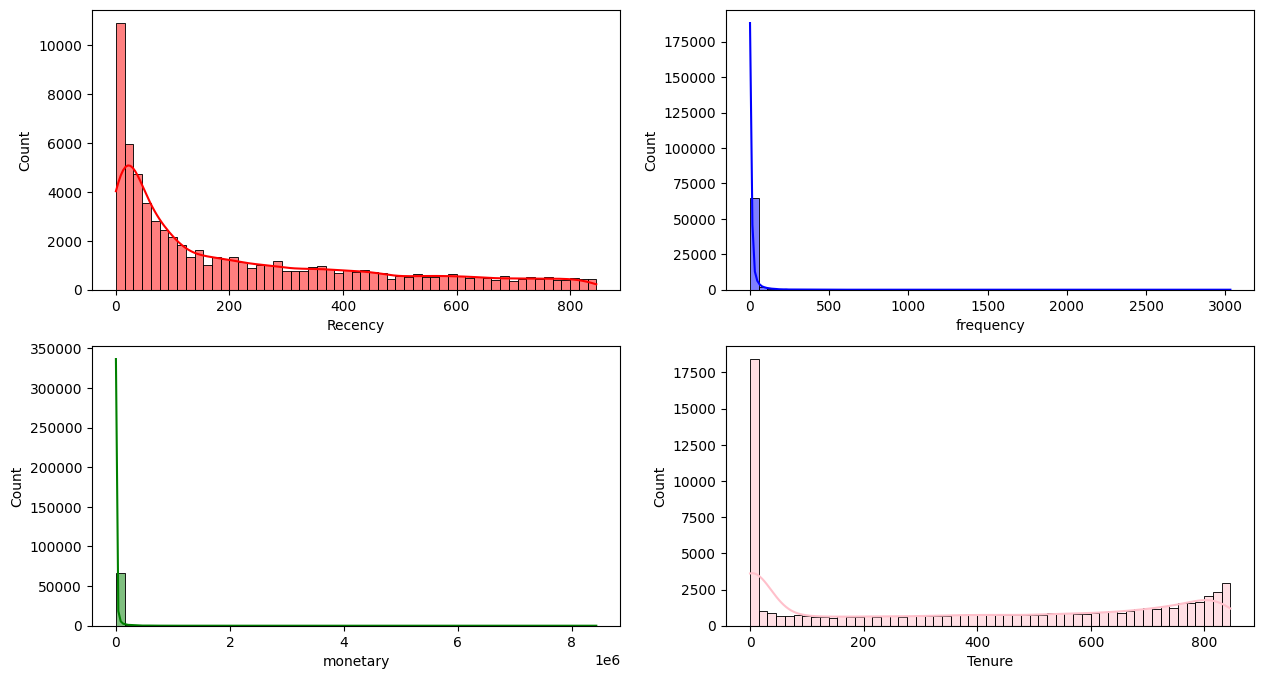

In [123]:
fig,ax=plt.subplots(2,2,figsize=(15,8))
sns.histplot(df_group_clustering['Recency'],bins=55,kde=True,color='red',ax=ax[0,0])
sns.histplot(df_group_clustering['frequency'],bins=55,kde=True,color='blue',ax=ax[0,1])
sns.histplot(df_group_clustering['monetary'],bins=55,kde=True,color='green',ax=ax[1,0])
sns.histplot(df_group_clustering['Tenure'],bins=55,kde=True,color='pink',ax=ax[1,1])

<Axes: ylabel='Tenure'>

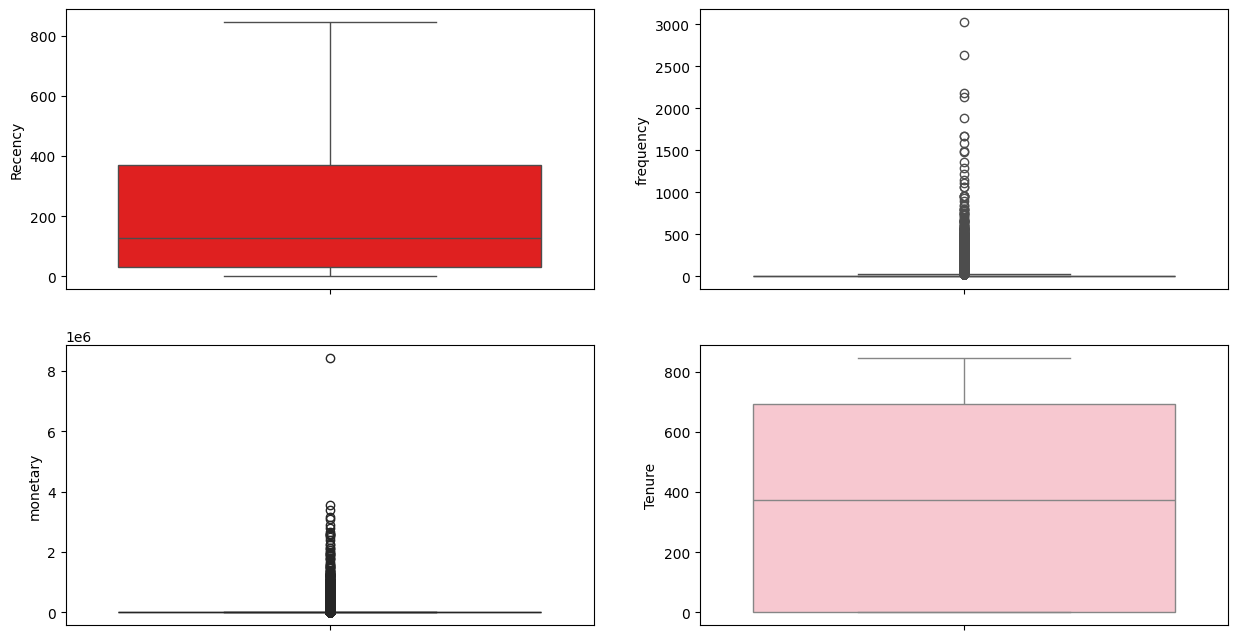

In [124]:
fig,ax=plt.subplots(2,2,figsize=(15,8))
sns.boxplot(df_group_clustering['Recency'],color='red',ax=ax[0,0])
sns.boxplot(df_group_clustering['frequency'],color='blue',ax=ax[0,1])
sns.boxplot(df_group_clustering['monetary'],color='green',ax=ax[1,0])
sns.boxplot(df_group_clustering['Tenure'],color='pink',ax=ax[1,1])

In [125]:
df_group_clustering.describe()

,first_purchase,first_purchase,frequency,monetary,Recency,Tenure
count,68805,68805,68805.000000,6.880500e+04,68805.000000,68805.000000
mean,2022-09-06 07:32:48.816219904,2023-09-16 19:58:44.028776960,14.885386,1.928240e+04,224.167546,375.518000
min,2022-01-01 00:00:00,2022-01-03 00:00:00,1.000000,1.200000e-01,0.000000,0.000000
25%,2022-02-11 00:00:00,2023-04-25 00:00:00,2.000000,2.614000e+02,31.000000,3.000000
50%,2022-06-09 00:00:00,2023-12-22 00:00:00,4.000000,9.230000e+02,128.000000,373.000000
75%,2023-02-16 00:00:00,2024-03-28 00:00:00,11.000000,6.509650e+03,369.000000,692.000000
max,2024-04-27 00:00:00,2024-04-28 00:00:00,3031.000000,8.427424e+06,846.000000,846.000000
std,NaN,NaN,47.251637,9.196912e+04,235.368222,315.200697


In [126]:
df_group_clustering=df_group_clustering.iloc[:,[0,3,4,5,6]]

In [127]:
df_group_clustering.set_index('customer_number',inplace=True)

In [128]:
df_group_clustering.describe()

,frequency,monetary,Recency,Tenure
count,68805.000000,6.880500e+04,68805.000000,68805.000000
mean,14.885386,1.928240e+04,224.167546,375.518000
std,47.251637,9.196912e+04,235.368222,315.200697
min,1.000000,1.200000e-01,0.000000,0.000000
25%,2.000000,2.614000e+02,31.000000,3.000000
50%,4.000000,9.230000e+02,128.000000,373.000000
75%,11.000000,6.509650e+03,369.000000,692.000000
max,3031.000000,8.427424e+06,846.000000,846.000000


In [129]:
df_group_clustering.isna().sum()

frequency    0
monetary     0
Recency      0
Tenure       0
dtype: int64

### remove skewness

Applying Log transformation to remove skewness

In [130]:
def sqrt_transform(x):
    return np.where(x >= 0, np.sqrt(x), -np.sqrt(np.abs(x)))
df_group_clustering_sqrt = df_group_clustering.apply(sqrt_transform)

In [131]:
df_group_clustering_log=np.log(df_group_clustering_sqrt)

/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


In [132]:
df_group_clustering_log.head()

,frequency,monetary,Recency,Tenure
customer_number,,,,
30303430353030313430,1.497866,4.543465,1.831781,3.341054
30303430353030313630,2.582393,6.587595,0.693147,3.366701
30303430353030313631,1.748254,4.254056,1.098612,3.359507
30303430353030313633,2.654134,5.544930,0.346574,3.367296
30303430353030313732,2.663938,6.302931,0.693147,3.366701


<Axes: xlabel='Tenure', ylabel='Count'>

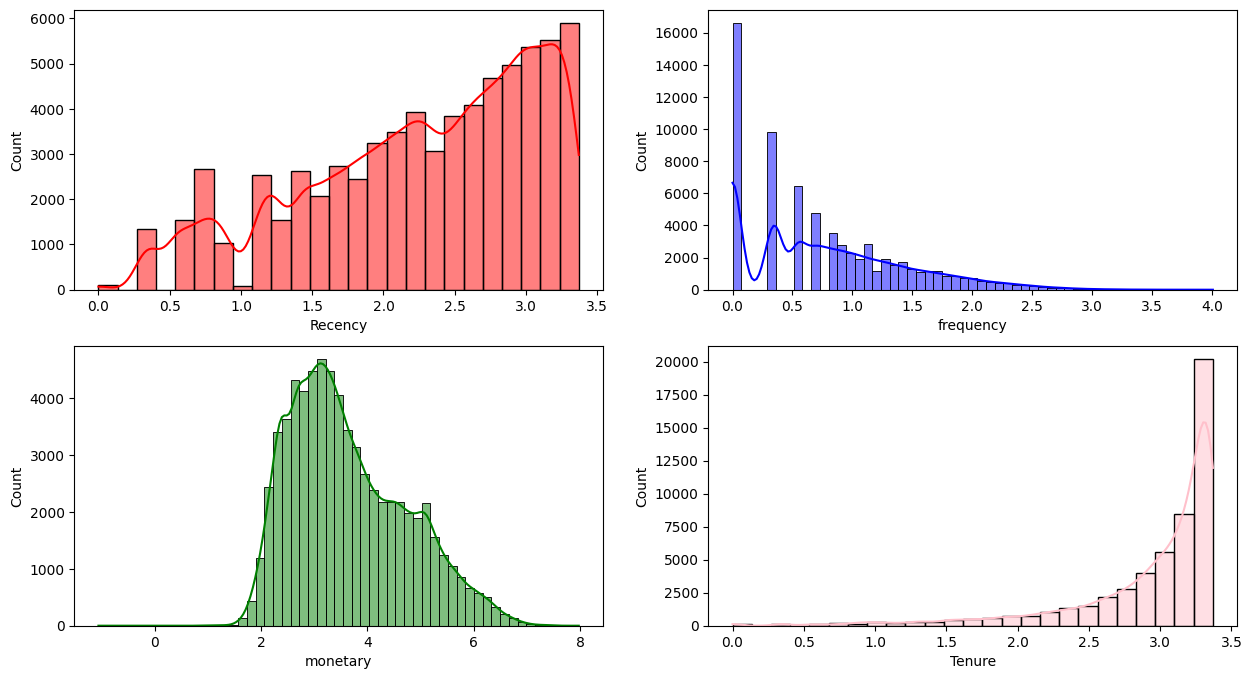

In [133]:
fig,ax=plt.subplots(2,2,figsize=(15,8))
sns.histplot(df_group_clustering_log['Recency'],bins=25,kde=True,color='red',ax=ax[0,0])
sns.histplot(df_group_clustering_log['frequency'],bins=55,kde=True,color='blue',ax=ax[0,1])
sns.histplot(df_group_clustering_log['monetary'],bins=55,kde=True,color='green',ax=ax[1,0])
sns.histplot(df_group_clustering_log['Tenure'],bins=25,kde=True,color='pink',ax=ax[1,1])

<Axes: ylabel='Tenure'>

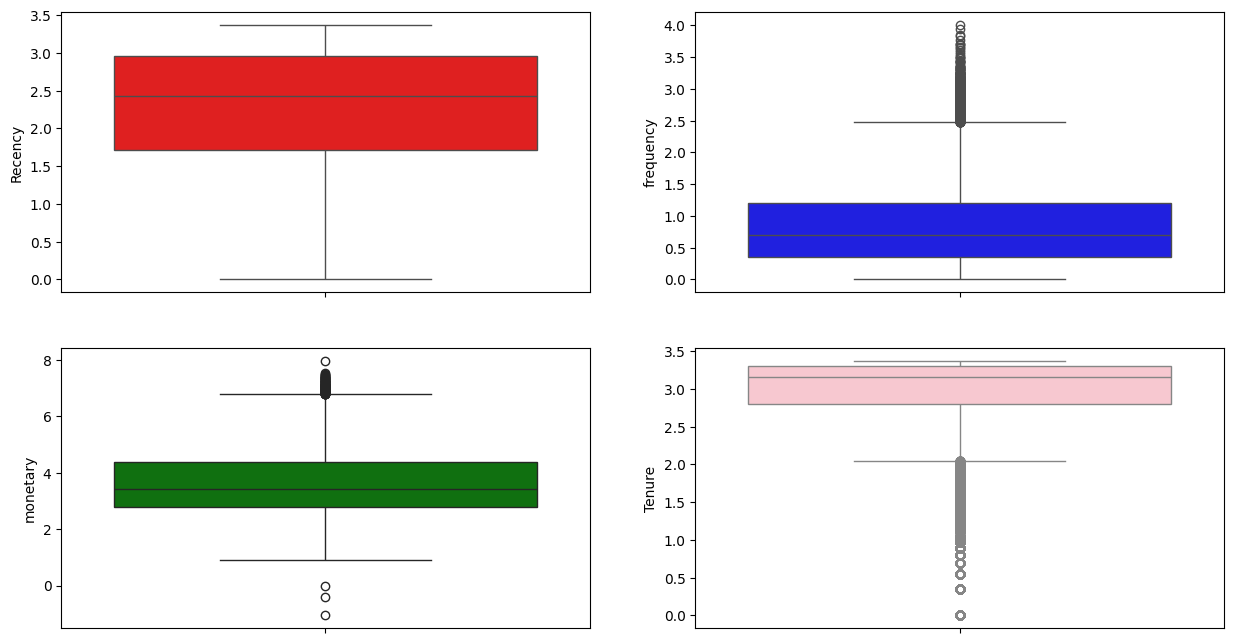

In [134]:
fig,ax=plt.subplots(2,2,figsize=(15,8))
sns.boxplot(df_group_clustering_log['Recency'],color='red',ax=ax[0,0])
sns.boxplot(df_group_clustering_log['frequency'],color='blue',ax=ax[0,1])
sns.boxplot(df_group_clustering_log['monetary'],color='green',ax=ax[1,0])
sns.boxplot(df_group_clustering_log['Tenure'],color='pink',ax=ax[1,1])

In [135]:
df_group_clustering_log.describe().round(2)

,frequency,monetary,Recency,Tenure
count,68805.00,68805.00,68805.00,68805.00
mean,0.77,3.63,-inf,-inf
std,0.67,1.09,NaN,NaN
min,0.00,-1.06,-inf,-inf
25%,0.35,2.78,1.72,0.55
50%,0.69,3.41,2.43,2.96
75%,1.20,4.39,2.96,3.27
max,4.01,7.97,3.37,3.37


In [136]:
df_group_clustering_log.isin([np.inf, -np.inf]).sum()/len(df_group_clustering_log)

frequency    0.000000
monetary     0.000000
Recency      0.000044
Tenure       0.244459
dtype: float64

In [137]:
t_max=df_group_clustering_log['Tenure'].quantile(0.99)
t_min=df_group_clustering_log['Tenure'].quantile(0.05)

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


In [138]:
df_group_clustering_log['Tenure'].replace([np.inf],t_max , inplace=True)
df_group_clustering_log['Tenure'].replace([-np.inf],t_min , inplace=True)

In [139]:
r_max=df_group_clustering_log['Recency'].quantile(0.99)
r_min=df_group_clustering_log['Recency'].quantile(0.05)

In [140]:
df_group_clustering_log['Recency'].replace([np.inf],r_max , inplace=True)
df_group_clustering_log['Recency'].replace([-np.inf],r_min , inplace=True)

In [141]:
df_group_clustering_log.isin([np.inf, -np.inf]).sum()/len(df_group_clustering_log)

frequency    0.0
monetary     0.0
Recency      0.0
Tenure       0.0
dtype: float64

In [142]:
df_group_clustering_log.isna().sum()/len(df_group_clustering_log)

frequency    0.000000
monetary     0.000000
Recency      0.000000
Tenure       0.244459
dtype: float64

### Impute missing values

In [143]:
df_group_clustering_log.replace(np.nan,0,inplace=True)

In [144]:
df_group_clustering_log.isna().sum()/len(df_group_clustering_log)

frequency    0.0
monetary     0.0
Recency      0.0
Tenure       0.0
dtype: float64

### Scaling the data

In [145]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_group_clustering_normalized=scaler.fit_transform(df_group_clustering_log)

In [146]:
df_group_clustering_normalized=pd.DataFrame(df_group_clustering_normalized,index=df_group_clustering_log.index,columns=df_group_clustering_log.columns.to_list())

In [147]:
df_group_clustering_normalized.head()

,frequency,monetary,Recency,Tenure
customer_number,,,,
30303430353030313430,1.075663,0.835929,-0.530253,0.830170
30303430353030313630,2.686980,2.711967,-1.928537,0.849134
30303430353030313631,1.447672,0.570319,-1.430611,0.843814
30303430353030313633,2.793568,1.755043,-2.354143,0.849574
30303430353030313732,2.808134,2.450711,-1.928537,0.849134


In [148]:
df_group_clustering_normalized.describe()

,frequency,monetary,Recency,Tenure
count,6.880500e+04,6.880500e+04,6.880500e+04,6.880500e+04
mean,-4.626454e-17,2.131473e-16,4.031624e-16,2.379319e-16
std,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00
min,-1.149765e+00,-4.306874e+00,-2.779748e+00,-1.640391e+00
25%,-6.348498e-01,-7.797457e-01,-6.712164e-01,-1.234204e+00
50%,-1.199340e-01,-2.008278e-01,1.994881e-01,5.489806e-01
75%,6.315502e-01,6.955618e-01,8.495901e-01,7.774751e-01
max,4.805532e+00,3.983907e+00,1.359055e+00,8.517658e-01


In [149]:
df_group_clustering_normalized.isna().sum()

frequency    0
monetary     0
Recency      0
Tenure       0
dtype: int64

### Creating clusters

In [150]:
from sklearn.cluster import KMeans
sse={}
for i in range(1,16):
    kmeans=KMeans(n_clusters=i,random_state=1)
    model=kmeans.fit(df_group_clustering_normalized)
    sse[i]=model.inertia_


print(sse)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

{1: 275220.00000000093, 2: 135377.7179599941, 3: 79697.40160605285, 4: 63245.81258388706, 5: 54363.348273850665, 6: 48539.78391557741, 7: 43020.345280989844, 8: 39188.43082683142, 9: 35462.9404307354, 10: 32957.663746457765, 11: 30620.19493016675, 12: 28755.316136311376, 13: 27407.10417412469, 14: 26185.879835247702, 15: 24979.01399274665}


<Axes: title={'center': 'Elbow method'}, xlabel='i', ylabel='SSE'>

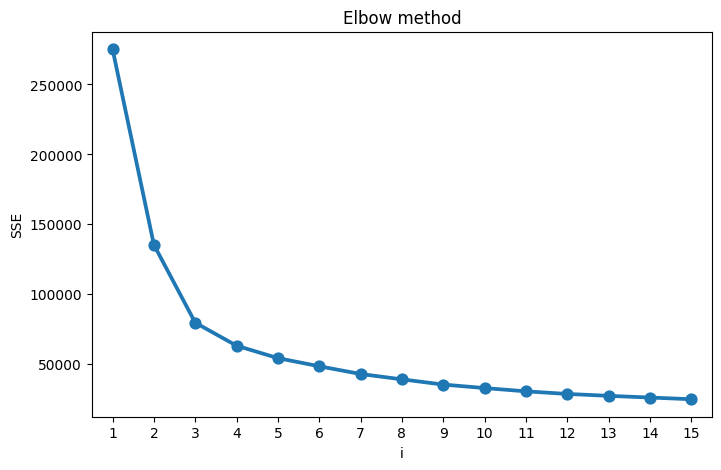

In [151]:
plt.figure(figsize=(8,5))
plt.title('Elbow method')
plt.xlabel('i')
plt.ylabel('SSE')
sns.pointplot(x=sse.keys(),y=sse.values())

In [152]:
kmeans=KMeans(n_clusters=4,random_state=1)
model=kmeans.fit(df_group_clustering_normalized)
cluster=model.labels_
df_group_clustering_normalized['Cluster']=cluster


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [153]:
df_group_clustering_normalized.head()

,frequency,monetary,Recency,Tenure,Cluster
customer_number,,,,,
30303430353030313430,1.075663,0.835929,-0.530253,0.830170,2
30303430353030313630,2.686980,2.711967,-1.928537,0.849134,1
30303430353030313631,1.447672,0.570319,-1.430611,0.843814,1
30303430353030313633,2.793568,1.755043,-2.354143,0.849574,1
30303430353030313732,2.808134,2.450711,-1.928537,0.849134,1


In [155]:
#DeepnoteChart(df_group_clustering_normalized, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"bar","tooltip":true},"encoding":{"x":{"axis":{"grid":false},"sort":"ascending","type":"nominal","field":"Cluster","scale":{"type":"linear"}},"y":{"axis":{"grid":false},"sort":null,"type":"quantitative","scale":{"type":"linear"},"format":{"type":"default","decimals":null},"aggregate":"count","formatType":"numberFormatFromNumberType"},"color":{"sort":null,"type":"nominal","field":"Cluster","scale":{"scheme":"deepnote20"}}}},{"mark":{"dx":0,"dy":-1,"fill":"black","type":"text","align":"center","baseline":"bottom"},"encoding":{"x":{"axis":{"grid":false},"sort":"ascending","type":"nominal","field":"Cluster","scale":{"type":"linear"}},"y":{"axis":{"grid":false},"sort":null,"type":"quantitative","scale":{"type":"linear"},"format":{"type":"default","decimals":null},"aggregate":"count","formatType":"numberFormatFromNumberType"},"text":{"sort":null,"type":"quantitative","aggregate":"count"},"color":{"sort":null,"type":"nominal","field":"Cluster","scale":{"scheme":"deepnote20"}}}}]}],"title":"No of customers per cluster ","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{},"usermeta":{"tooltipDefaultMode":true}}""")

In [156]:
pivot_cluster=pd.pivot_table(data=df_group_clustering_normalized,index='Cluster',values=['Recency','frequency','monetary','Tenure'],aggfunc='mean')

In [157]:
pivot_cluster=pivot_cluster.transpose()

In [158]:
pivot_cluster.reset_index(inplace=True)

In [159]:
pivot_cluster

Cluster,index,0,1,2,3
0,Recency,0.702859,-1.454074,-0.550919,0.549239
1,Tenure,-1.588284,0.801508,0.675678,0.381790
2,frequency,-1.100695,1.741142,0.455867,-0.262927
3,monetary,-0.890334,1.655899,0.426675,-0.375429


<Axes: xlabel='Cluster'>

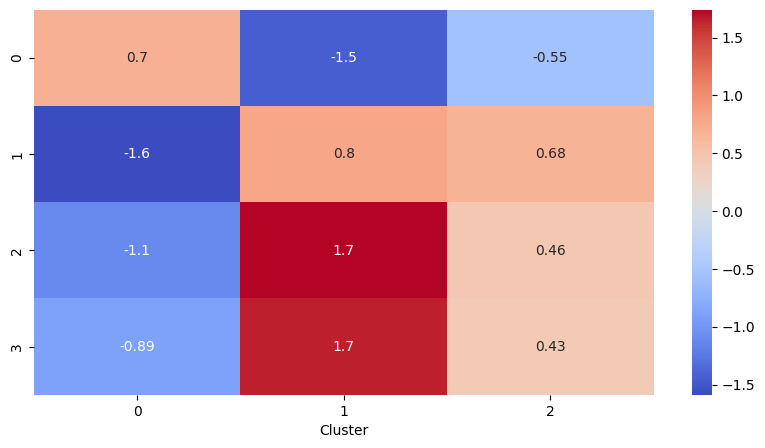

In [160]:
plt.figure(figsize=(10,5))
sns.heatmap(pivot_cluster.iloc[:,1:-1],annot=True,fmt='.2g',cmap='coolwarm',)

In [162]:
#DeepnoteChart(pivot_cluster, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"trail","color":"#2266D3","tooltip":true},"encoding":{"x":{"axis":{"grid":false},"sort":null,"type":"nominal","field":"index","scale":{"type":"linear","zero":false}},"y":{"axis":{"grid":false},"sort":null,"type":"quantitative","field":"0","scale":{"type":"linear","zero":false},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"color":{"datum":"0"}}}]},{"layer":[{"mark":{"clip":true,"type":"trail","color":"#4c78a8","tooltip":true},"encoding":{"x":{"axis":{"grid":false},"sort":null,"type":"nominal","field":"index","scale":{"type":"linear","zero":false}},"y":{"axis":{"grid":false},"sort":null,"type":"quantitative","field":"1","scale":{"type":"linear","zero":false},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"color":{"datum":"1"}}}]},{"layer":[{"mark":{"clip":true,"type":"trail","color":"#f58518","tooltip":true},"encoding":{"x":{"axis":{"grid":false},"sort":null,"type":"nominal","field":"index","scale":{"type":"linear","zero":false}},"y":{"axis":{"grid":false},"sort":null,"type":"quantitative","field":"2","scale":{"type":"linear","zero":false},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"color":{"datum":"2"}}}]},{"layer":[{"mark":{"clip":true,"type":"trail","color":"#e45756","tooltip":true},"encoding":{"x":{"axis":{"grid":false},"sort":null,"type":"nominal","field":"index","scale":{"type":"linear","zero":false}},"y":{"axis":{"grid":false},"sort":null,"type":"quantitative","field":"3","scale":{"type":"linear","zero":false},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"color":{"datum":"3"}}}]},{"layer":[{"mark":{"clip":true,"type":"trail","color":"#83bcb6","tooltip":true},"encoding":{"x":{"axis":{"grid":false,"title":null},"sort":null,"type":"nominal","field":"index","scale":{"type":"linear","zero":false}},"y":{"axis":{"grid":false,"title":null},"sort":null,"type":"quantitative","field":"3","scale":{"type":"linear","zero":false},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"color":{"datum":"3"}}}]}],"title":"Snake Diagram ","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{},"usermeta":{"tooltipDefaultMode":true}}""")

In [163]:
df_group_clustering_normalized.reset_index(inplace=True)

In [164]:
df_group_clustering_normalized.head()

,customer_number,frequency,monetary,Recency,Tenure,Cluster
0,30303430353030313430,1.075663,0.835929,-0.530253,0.830170,2
1,30303430353030313630,2.686980,2.711967,-1.928537,0.849134,1
2,30303430353030313631,1.447672,0.570319,-1.430611,0.843814,1
3,30303430353030313633,2.793568,1.755043,-2.354143,0.849574,1
4,30303430353030313732,2.808134,2.450711,-1.928537,0.849134,1


In [165]:
data_5.head()

,order_date,order_number,material_number,order_material_net_value,sales_channel,PRH1,PRH4,customer_group,customer_number,DSO_Ind,Cohort,Invoice_Month
0,2022-05-12,112140438,034.053V4,40.30,eShop,Implant Solutions,"Instruments, Cases + Others",University,30303430353030353632,Non-DSO,2022-01,5
1,2022-11-21,112638658,044.710,120.25,eShop,Implant Solutions,"Instruments, Drills + Taps",University,30303430353030353632,Non-DSO,2022-01,11
2,2022-07-14,112311447,025.4101,23.80,eShop,Restorative Solutions,Other Prosthetics,University,30303430353030353632,Non-DSO,2022-01,7
3,2022-06-06,112204302,025.4101,22.75,eShop,Restorative Solutions,Other Prosthetics,University,30303430353030353632,Non-DSO,2022-01,6
4,2022-03-24,112007820,025.4101,227.50,eShop,Restorative Solutions,Other Prosthetics,University,30303430353030353632,Non-DSO,2022-01,3


In [166]:
data_final2=pd.merge(df_group_clustering_normalized[['customer_number','Cluster']],data_5[['customer_number','customer_group']],how='left',on='customer_number')

In [167]:
data_final3=pd.merge(data_5,df_group_clustering_normalized[['customer_number','Cluster']],how='left',on='customer_number')

In [169]:
#DeepnoteChart(data_final2, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"bar","tooltip":true},"encoding":{"x":{"axis":{"grid":false},"sort":"ascending","type":"nominal","field":"Cluster","scale":{"type":"linear"}},"y":{"axis":{"grid":false,"title":"No of customers "},"sort":null,"type":"quantitative","scale":{"type":"linear"},"format":{"type":"default","decimals":null},"aggregate":"count","formatType":"numberFormatFromNumberType"},"color":{"sort":{"order":"descending","encoding":"y"},"type":"nominal","field":"customer_group","scale":{"scheme":"deepnote10"}},"xOffset":{"sort":{"order":"descending","encoding":"y"},"type":"nominal","field":"customer_group"}}}]}],"title":"","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{},"usermeta":{"tooltipDefaultMode":true}}""")

In [170]:
#DeepnoteChart(data_final2, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"bar","tooltip":true},"encoding":{"x":{"axis":{"grid":false},"sort":{"order":"descending","encoding":"y"},"type":"nominal","field":"customer_group","scale":{"type":"linear"}},"y":{"axis":{"grid":false},"sort":null,"type":"quantitative","scale":{"type":"linear"},"format":{"type":"default","decimals":null},"aggregate":"count","formatType":"numberFormatFromNumberType"},"color":{"sort":null,"type":"nominal","field":"Cluster","scale":{"scheme":"accent"}},"xOffset":{"sort":null,"type":"nominal","field":"Cluster"}}}]}],"title":"","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{},"usermeta":{"tooltipDefaultMode":true}}""")

In [171]:
#DeepnoteChart(data_final3, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"bar","tooltip":true},"encoding":{"x":{"axis":{"grid":false,"title":null},"sort":"ascending","type":"nominal","field":"Cluster","scale":{"type":"linear"},"stack":"zero"},"y":{"axis":{"grid":false,"title":"No of Customers "},"sort":null,"type":"nominal","field":"customer_number","scale":{"type":"linear"},"stack":"zero","aggregate":"distinct"},"color":{"sort":null,"type":"nominal","field":"sales_channel","scale":{"scheme":"accent"}}}}]}],"title":"","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{},"usermeta":{"tooltipDefaultMode":true}}""")

In [177]:
data_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3167194 entries, 0 to 3167193
Data columns (total 12 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   order_date                datetime64[ns]
 1   order_number              int64         
 2   material_number           object        
 3   order_material_net_value  float64       
 4   sales_channel             object        
 5   PRH1                      object        
 6   PRH4                      object        
 7   customer_group            object        
 8   customer_number           object        
 9   DSO_Ind                   object        
 10  Cohort                    period[M]     
 11  Invoice_Month             int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(7), period[M](1)
memory usage: 290.0+ MB


### Analysis of cluster '0'

In [178]:
cluster_0=data_5[data_5['customer_number'].isin(df_group_clustering_normalized[df_group_clustering_normalized['Cluster']==0]['customer_number'])]

In [179]:
cluster_0.shape

(49033, 12)

In [180]:
cluster_0['customer_number'].nunique()

18260

In [181]:
#DeepnoteChart(cluster_0, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"bar","tooltip":true},"encoding":{"x":{"axis":{"grid":false,"title":null},"sort":null,"type":"nominal","field":"sales_channel","scale":{"type":"linear"}},"y":{"axis":{"grid":false},"sort":null,"type":"quantitative","field":"order_number","scale":{"type":"linear"},"format":{"type":"default","decimals":null},"aggregate":"distinct","formatType":"numberFormatFromNumberType"},"color":{"sort":null,"type":"nominal","field":"PRH1","scale":{"scheme":"deepnote20"}},"xOffset":{"sort":null,"type":"nominal","field":"PRH1"}}},{"mark":{"dx":0,"dy":-1,"fill":"black","type":"text","align":"center","baseline":"bottom"},"encoding":{"x":{"axis":{"grid":false,"title":null},"sort":null,"type":"nominal","field":"sales_channel","scale":{"type":"linear"}},"y":{"axis":{"grid":false},"sort":null,"type":"quantitative","field":"order_number","scale":{"type":"linear"},"format":{"type":"default","decimals":null},"aggregate":"distinct","formatType":"numberFormatFromNumberType"},"text":{"sort":null,"type":"quantitative","field":"order_number","aggregate":"distinct"},"color":{"sort":null,"type":"nominal","field":"PRH1","scale":{"scheme":"deepnote20"}},"xOffset":{"sort":null,"type":"nominal","field":"PRH1"}}}]}],"title":"No of orders for each product category ","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{},"usermeta":{"tooltipDefaultMode":true}}""")

In [182]:
#DeepnoteChart(cluster_0, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"bar","color":"#2266D3","tooltip":true},"encoding":{"x":{"axis":{"grid":false},"sort":{"order":"descending","encoding":"y"},"type":"nominal","field":"customer_group","scale":{"type":"linear"}},"y":{"axis":{"grid":false,"title":"No of customers"},"sort":null,"type":"quantitative","field":"customer_number","scale":{"type":"linear"},"format":{"type":"default","decimals":null},"aggregate":"distinct","formatType":"numberFormatFromNumberType"}}},{"mark":{"dx":0,"dy":-1,"fill":"black","type":"text","align":"center","baseline":"bottom"},"encoding":{"x":{"axis":{"grid":false},"sort":{"order":"descending","encoding":"y"},"type":"nominal","field":"customer_group","scale":{"type":"linear"}},"y":{"axis":{"grid":false,"title":"No of customers"},"sort":null,"type":"quantitative","field":"customer_number","scale":{"type":"linear"},"format":{"type":"default","decimals":null},"aggregate":"distinct","formatType":"numberFormatFromNumberType"},"text":{"sort":null,"type":"quantitative","field":"customer_number","aggregate":"distinct"}}}]}],"title":"Customer in CLuster 0","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{},"usermeta":{"tooltipDefaultMode":true}}""")

In [183]:
eshop_cluster0 = pd.pivot_table(cluster_0[(cluster_0['sales_channel']=='eShop')], index='Cohort', columns='Invoice_Month', values='customer_number', aggfunc='nunique',fill_value=0)

In [184]:
non_eshop_cluster0 = pd.pivot_table(cluster_0[(cluster_0['sales_channel']=='non-eShop')], index='Cohort', columns='Invoice_Month', values='customer_number', aggfunc='nunique',fill_value=0)

In [185]:
eshop_cluster0=round(eshop_cluster0.divide(eshop_cluster0.iloc[:,0],axis=0)*100,2)

In [186]:
non_eshop_cluster0=round(non_eshop_cluster0.divide(non_eshop_cluster0.iloc[:,0],axis=0)*100,2)

In [187]:
eshop_cluster0

Invoice_Month,1,2
Cohort,,
2022-01,100.0,2.06
2022-02,100.0,4.05
2022-03,100.0,2.25
2022-04,100.0,2.44
2022-05,100.0,0.00
2022-06,100.0,4.11
2022-07,100.0,0.00
2022-08,100.0,2.50
2022-09,100.0,1.39


In [188]:
non_eshop_cluster0

Invoice_Month,1,2
Cohort,,
2022-01,100.0,2.79
2022-02,100.0,3.06
2022-03,100.0,2.44
2022-04,100.0,2.84
2022-05,100.0,3.02
2022-06,100.0,1.77
2022-07,100.0,5.12
2022-08,100.0,1.34
2022-09,100.0,1.74


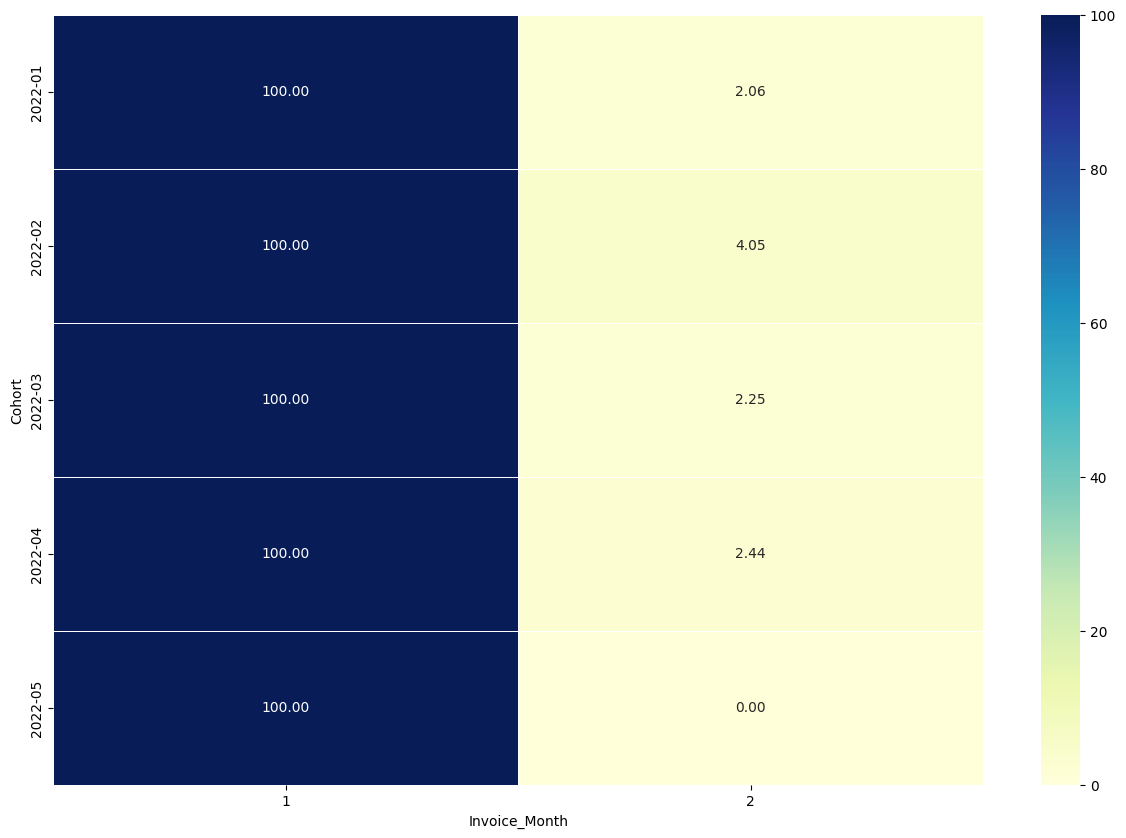

In [189]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15, 10))
# Customizing the appearance of the heatmap
sns.heatmap(eshop_cluster0.iloc[0:5,:], cmap='YlGnBu', annot=True, fmt='.2f', linewidths=.5)

# Display the plot
plt.show()


In [190]:
eshop_cluster0.describe()

Invoice_Month,1,2
count,28.0,28.000000
mean,100.0,2.228571
std,0.0,1.662316
min,100.0,0.000000
25%,100.0,1.047500
50%,100.0,2.115000
75%,100.0,4.000000
max,100.0,5.750000


In [191]:
pd.concat([non_eshop_cluster0.describe().iloc[:,1],eshop_cluster0.describe().iloc[:,1]],axis=1)

,2,2
count,28.000000,28.000000
mean,2.067857,2.228571
std,0.997201,1.662316
min,0.000000,0.000000
25%,1.397500,1.047500
50%,1.910000,2.115000
75%,2.617500,4.000000
max,5.120000,5.750000


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e2517096-4982-4c9f-bdc3-7c13c12c6695' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>